In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_znorm_rolling_avg_std_window_1025_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           960       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           14368     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            3600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              9

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

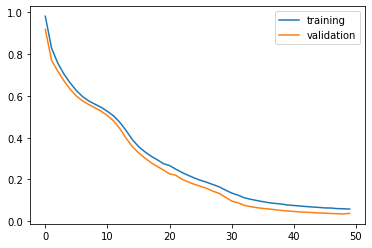

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)


50/50 [==============================] - 60s 1s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
4843  Inst  6360     1     h  7 2017-11-03 13:16:10   
4134  Inst  6984     1     h  7 2018-07-26 23:02:14   
1537  Inst  6340     1     h  7 2017-10-27 21:25:14   
995   Inst  7048     1     h  7 2018-08-13 07:55:15   
1481  Inst  6891     1     h  7 2018-07-06 22:03:14   

                                                   file  n_bunches  \
4843  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6360/...        908   
4134  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6984/...        286   
1537  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6340/...        172   
995   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7048/...       2556   
1481  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6891/...       1452   

      bunch_index  bunch_number  ts_length  chunk  
4843        643.0         344.0      65536     18  
4134        527.0         129.0      65536     16  
1537        210.0         103.0      65536      6  
995        1923.0        1423.0      65536      3  
1481       1994.0         842.0      65536      5

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 2)

In [13]:
train_prediction.shape

(396800, 2048, 2)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 5s 995ms/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  7310     1     h  7 2018-10-17 08:07:50   
1244  Inst  6429     1     h  7 2017-11-28 03:25:13   
5767  Inst  7467     1     h  7 2018-11-23 13:08:14   
7206  Inst  6215     1     h  7 2017-09-17 00:46:13   
7624  Inst  7310     1     h  7 2018-10-17 08:07:50   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7310/...       2556   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6429/...        524   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7467/...        733   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6215/...       2556   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7310/...       2556   

      bunch_index  bunch_number  ts_length  chunk  
4808        691.0         500.0      65536     18  
1244        999.0         188.0      65536      4  
5767       1066.0         225.0      65536     22  
7206       2109.0        1570.0      65536     28  
7624        691.0         500.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 2)

In [18]:
validation_prediction.shape

(39680, 2048, 2)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

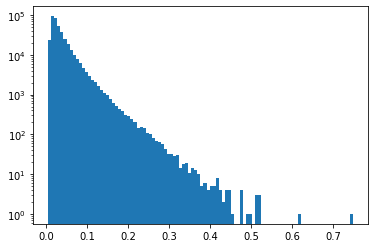

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

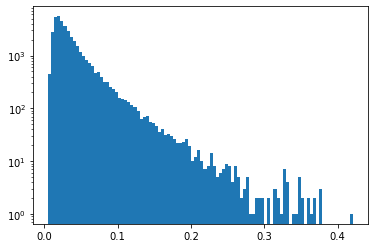

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.053477552813466174
type                                                         Inst
fill                                                         6360
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-03 13:16:10
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6360/...
n_bunches                                                     908
bunch_index                                                   643
bunch_number                                                  344
ts_length                                                   65536
chunk                                                          18
Name: 4843, dtype: object


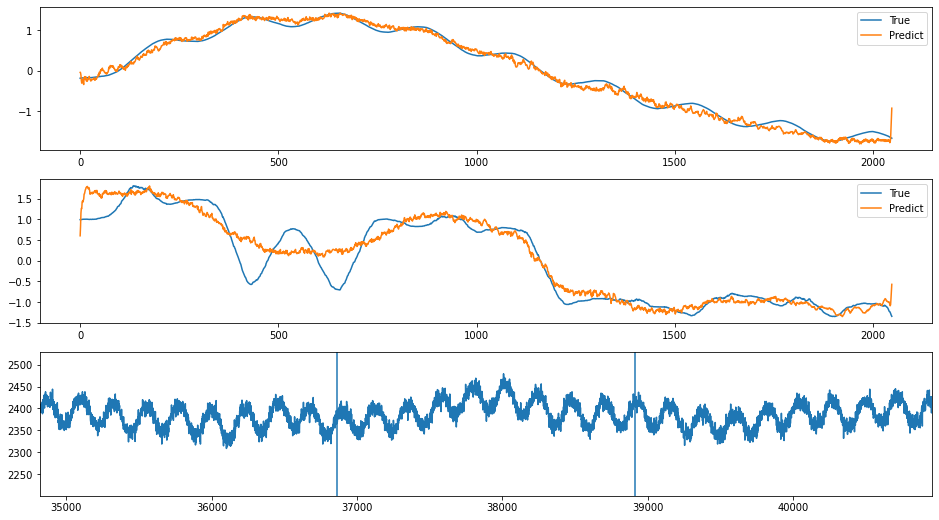

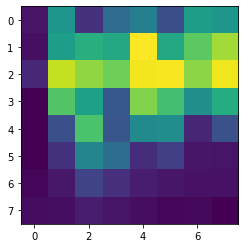

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 154721
Error: 0.005453849275580031
type                                                         Inst
fill                                                         6593
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-22 03:59:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6593/...
n_bunches                                                      72
bunch_index                                                   262
bunch_number                                                   71
ts_length                                                   65536
chunk                                                           8
Name: 2196, dtype: object


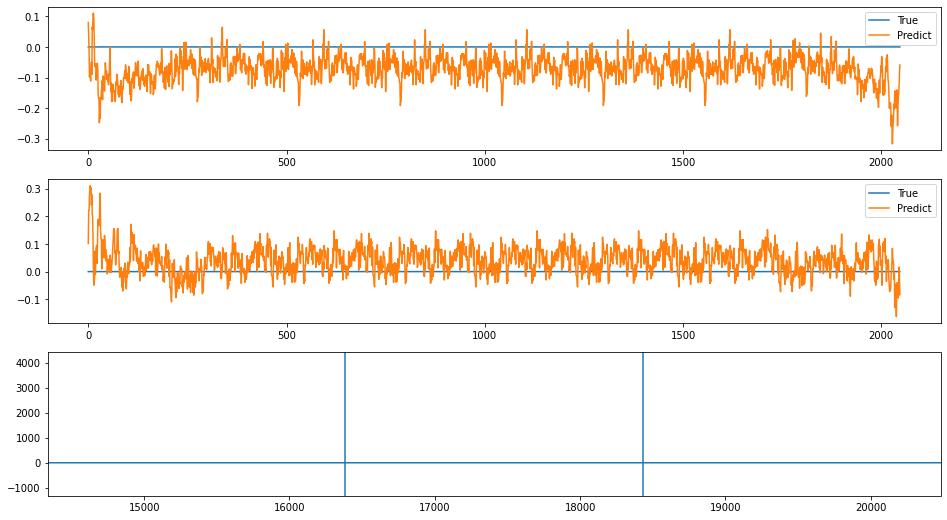

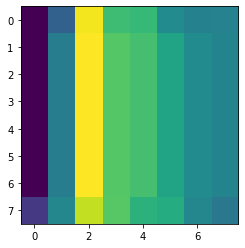

index: 116350
Error: 0.005453849275580031
type                                                         Inst
fill                                                         7448
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-16 07:04:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7448/...
n_bunches                                                     108
bunch_index                                                   481
bunch_number                                                   86
ts_length                                                   65536
chunk                                                           3
Name: 819, dtype: object


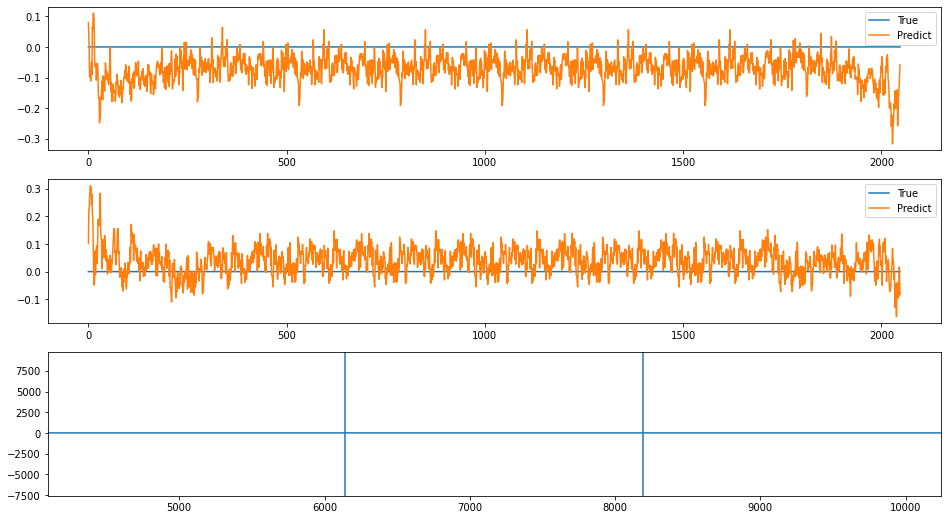

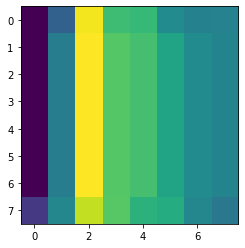

index: 381585
Error: 0.005453849275580031
type                                                         Inst
fill                                                         7454
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-18 23:07:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7454/...
n_bunches                                                      72
bunch_index                                                   285
bunch_number                                                   48
ts_length                                                   65536
chunk                                                           8
Name: 2069, dtype: object


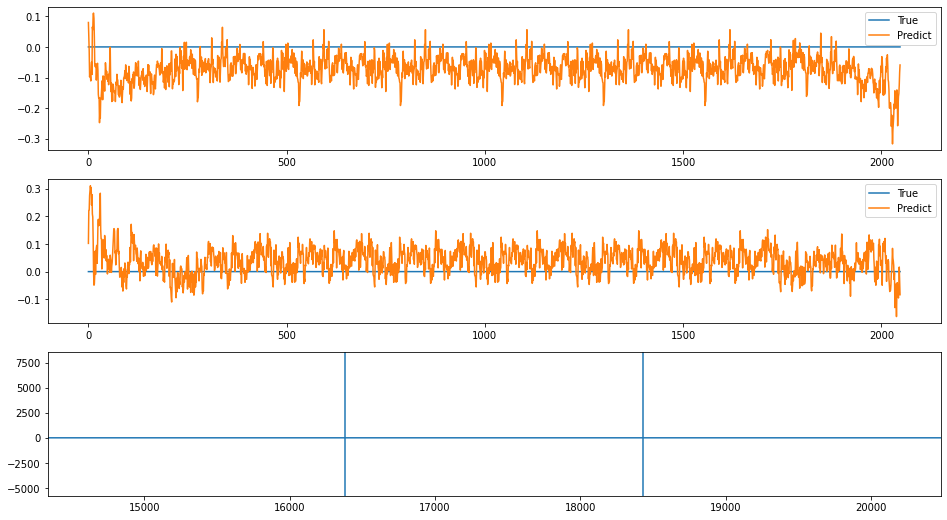

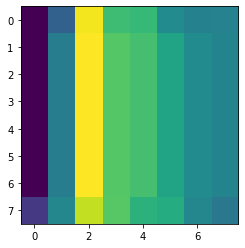

index: 312779
Error: 0.005453849275580031
type                                                         Inst
fill                                                         7442
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-13 19:06:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7442/...
n_bunches                                                     560
bunch_index                                                  3024
bunch_number                                                  557
ts_length                                                   65536
chunk                                                          10
Name: 2797, dtype: object


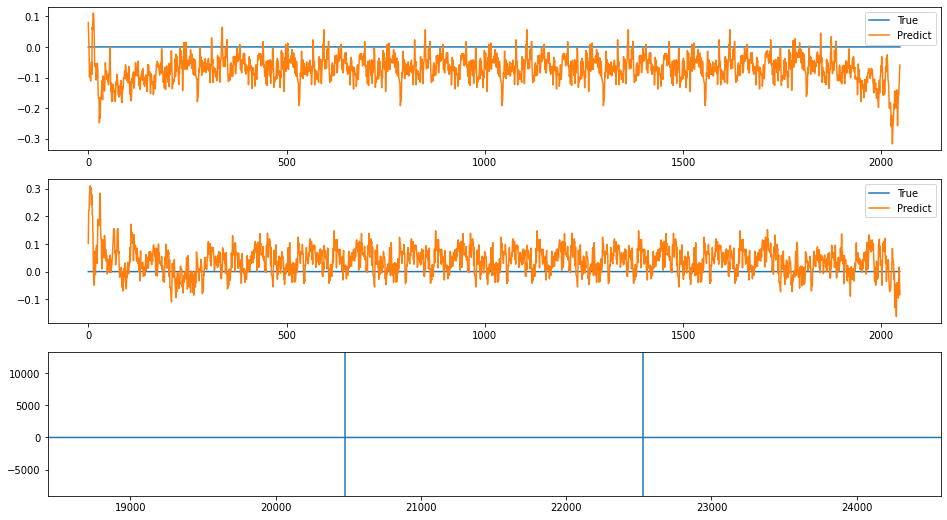

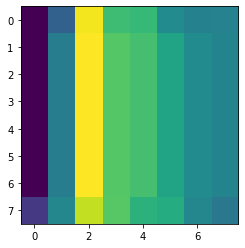

index: 75149
Error: 0.005453849275580031
type                                                         Inst
fill                                                         7344
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 06:41:07
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7344/...
n_bunches                                                     276
bunch_index                                                   986
bunch_number                                                  162
ts_length                                                   65536
chunk                                                           9
Name: 2323, dtype: object


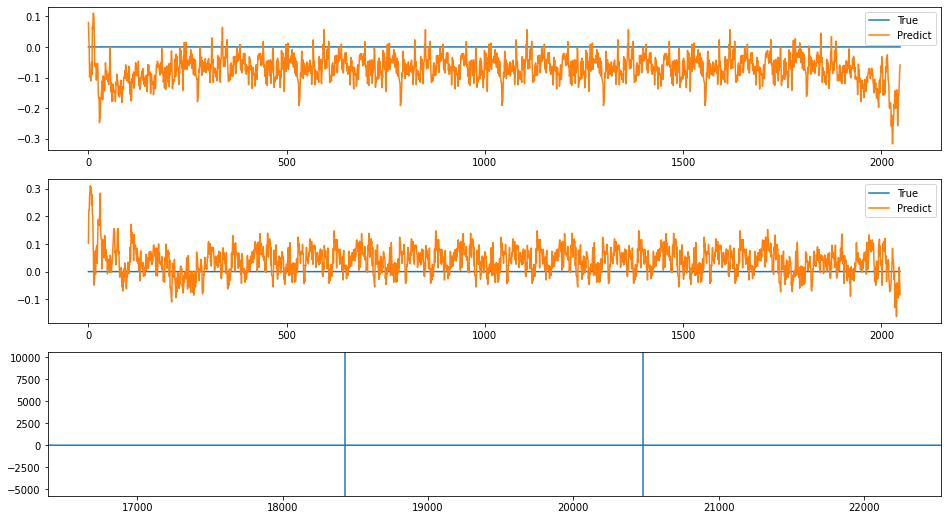

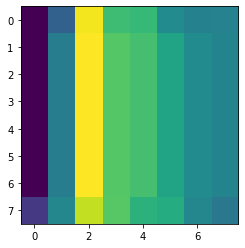

index: 208899
Error: 0.005453849275580031
type                                                         Inst
fill                                                         7133
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-07 12:08:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7133/...
n_bunches                                                     924
bunch_index                                                  1220
bunch_number                                                  897
ts_length                                                   65536
chunk                                                          21
Name: 5617, dtype: object


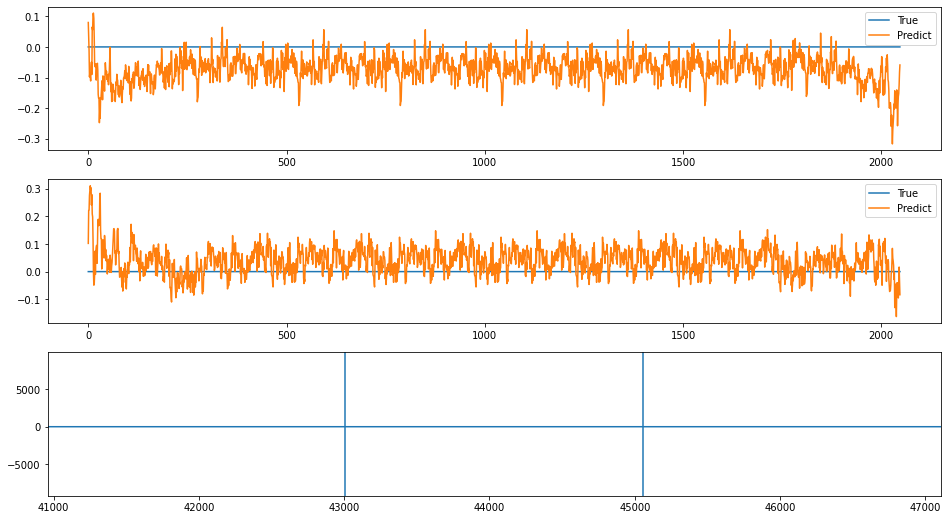

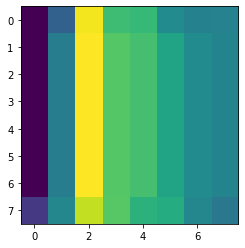

index: 279970
Error: 0.005453849275580031
type                                                         Inst
fill                                                         6611
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-25 09:08:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6611/...
n_bunches                                                     315
bunch_index                                                  2253
bunch_number                                                  258
ts_length                                                   65536
chunk                                                          26
Name: 6671, dtype: object


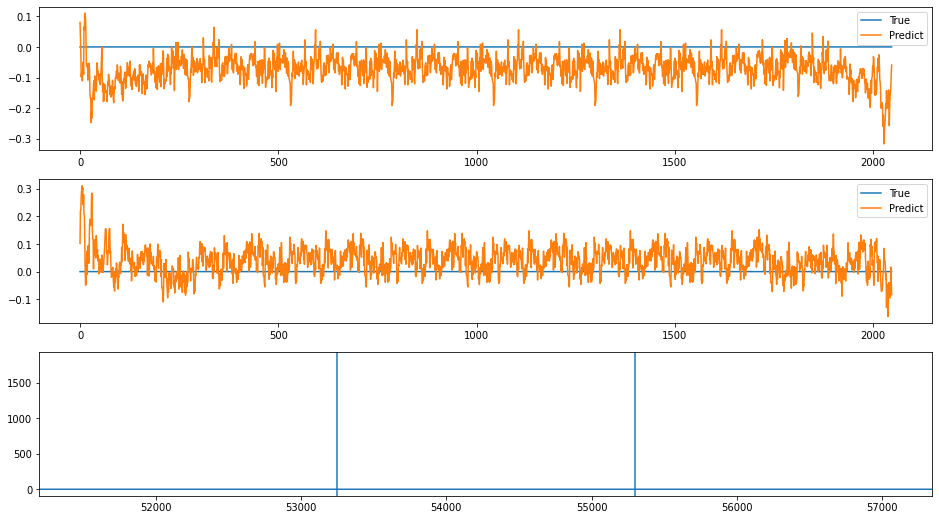

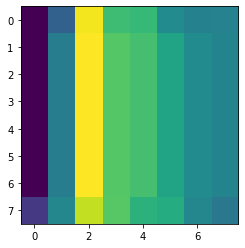

index: 103910
Error: 0.005453849275580031
type                                                         Inst
fill                                                         7024
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-05 07:42:18
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7024/...
n_bunches                                                     780
bunch_index                                                   976
bunch_number                                                  705
ts_length                                                   65536
chunk                                                           7
Name: 1972, dtype: object


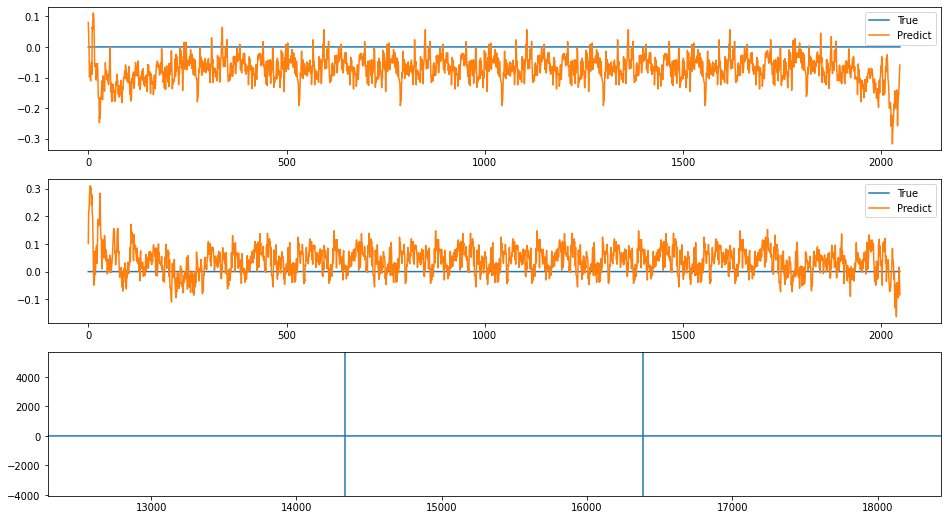

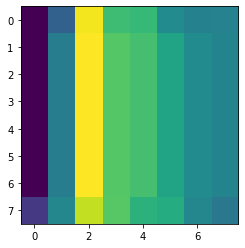

index: 222782
Error: 0.005453849275580031
type                                                         Inst
fill                                                         6185
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-10 03:02:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6185/...
n_bunches                                                    1412
bunch_index                                                  2531
bunch_number                                                 1407
ts_length                                                   65536
chunk                                                           8
Name: 2193, dtype: object


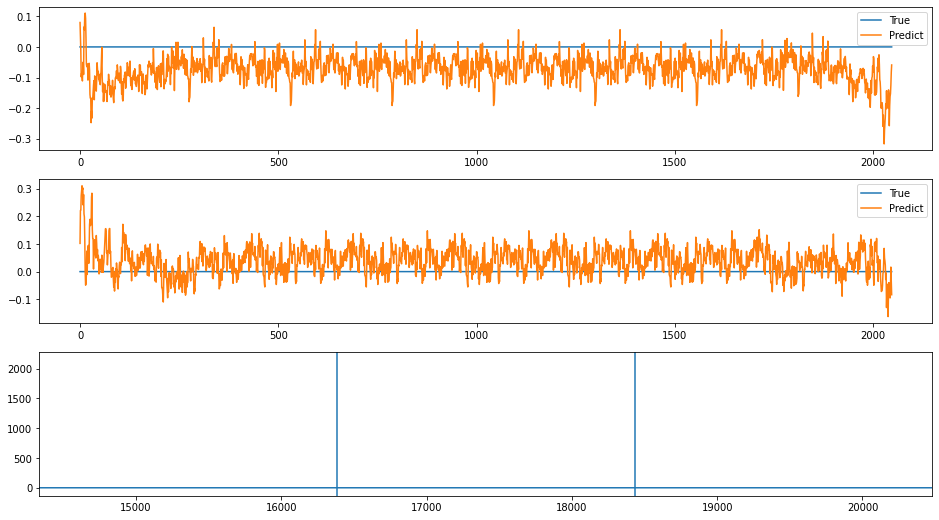

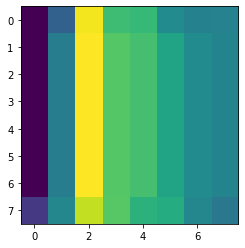

index: 277774
Error: 0.005453849275580031
type                                                         Inst
fill                                                         6611
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-25 09:08:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6611/...
n_bunches                                                     315
bunch_index                                                  2253
bunch_number                                                  258
ts_length                                                   65536
chunk                                                          29
Name: 7439, dtype: object


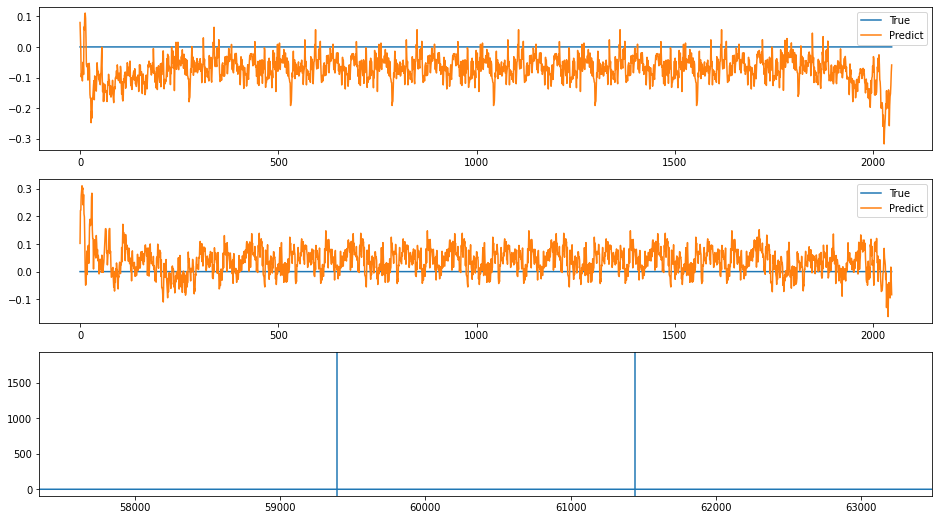

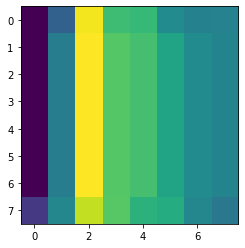

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 48124
Error: 0.7477920338704934
type                                                         Inst
fill                                                         6362
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-04 17:32:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6362/...
n_bunches                                                     524
bunch_index                                                   930
bunch_number                                                  495
ts_length                                                   65536
chunk                                                           4
Name: 1081, dtype: object


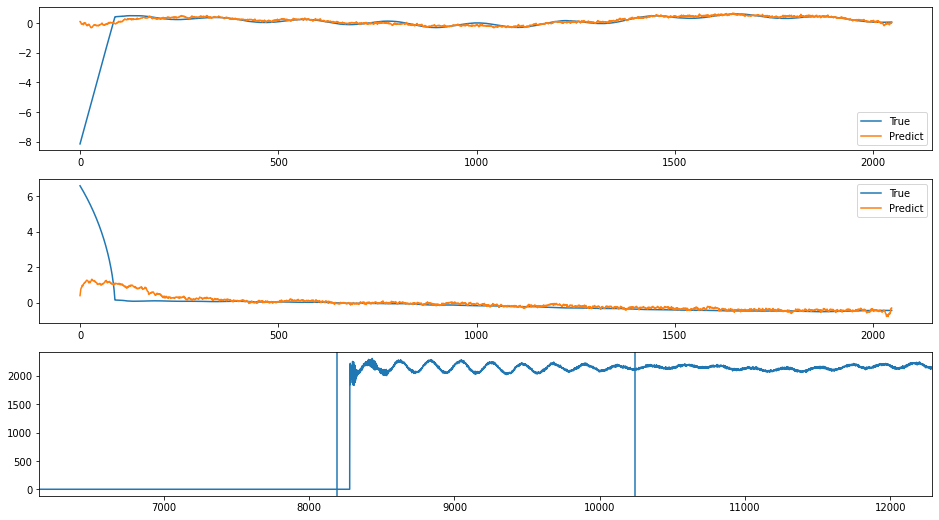

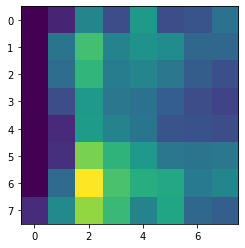

index: 334100
Error: 0.6212382971826518
type                                                         Inst
fill                                                         6193
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-12 23:21:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6193/...
n_bunches                                                     796
bunch_index                                                  1272
bunch_number                                                  691
ts_length                                                   65536
chunk                                                           3
Name: 907, dtype: object


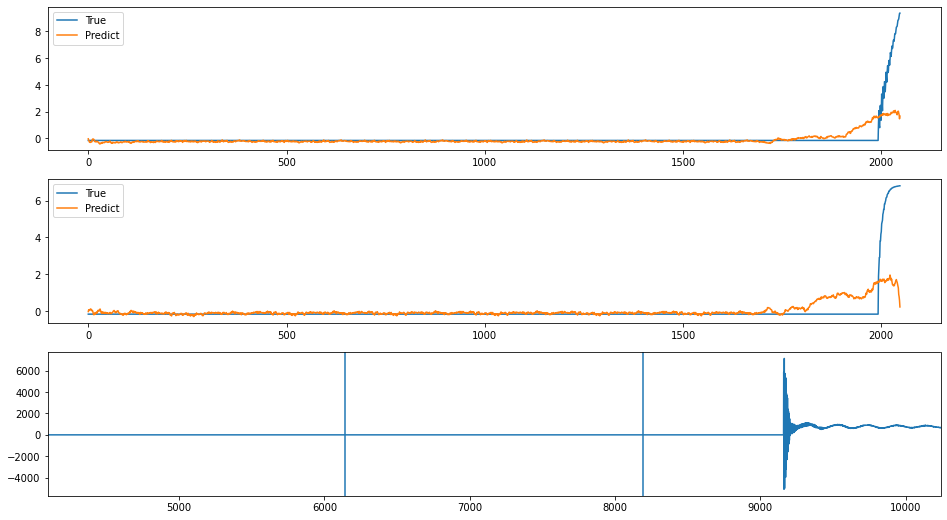

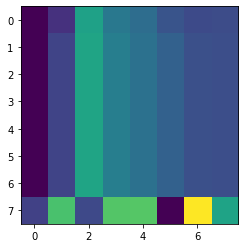

index: 326187
Error: 0.5203497713796386
type                                                         Inst
fill                                                         7324
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-21 05:19:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7324/...
n_bunches                                                     396
bunch_index                                                   153
bunch_number                                                   97
ts_length                                                   65536
chunk                                                           6
Name: 1699, dtype: object


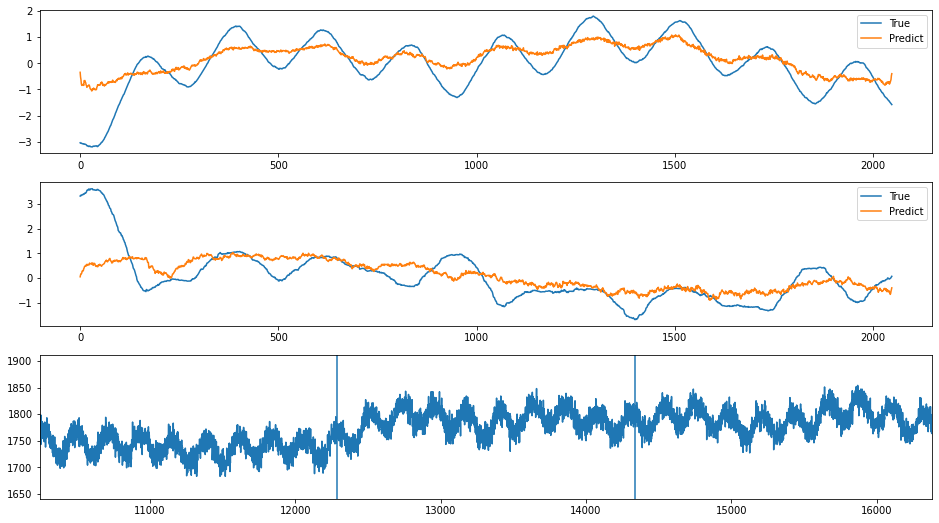

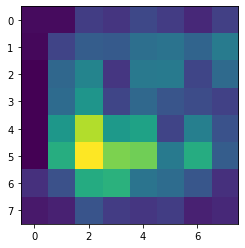

index: 366041
Error: 0.5199119175822053
type                                                         Inst
fill                                                         6613
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-26 00:33:18
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6613/...
n_bunches                                                     362
bunch_index                                                  2069
bunch_number                                                  339
ts_length                                                   65536
chunk                                                          18
Name: 4822, dtype: object


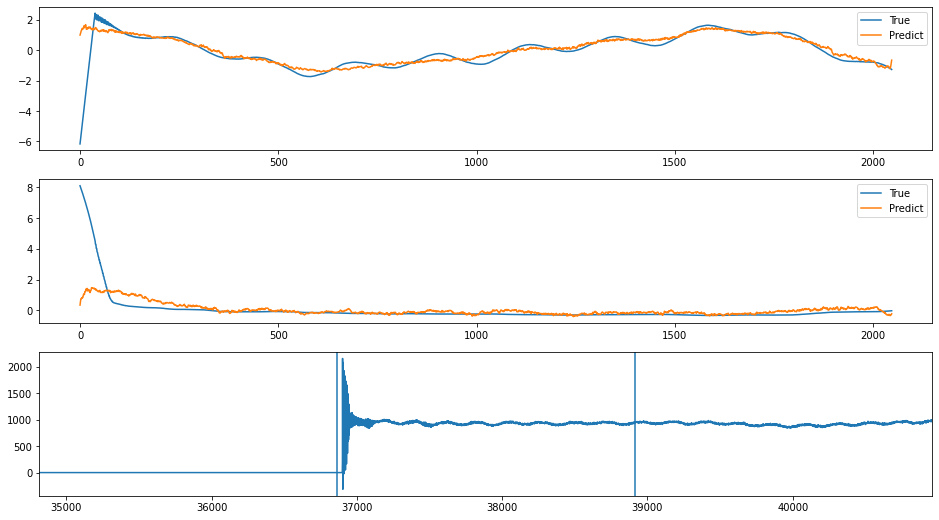

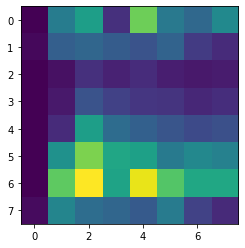

index: 162697
Error: 0.5181450025590426
type                                                         Inst
fill                                                         6272
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 01:27:24
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...
n_bunches                                                     780
bunch_index                                                    21
bunch_number                                                    9
ts_length                                                   65536
chunk                                                          29
Name: 7516, dtype: object


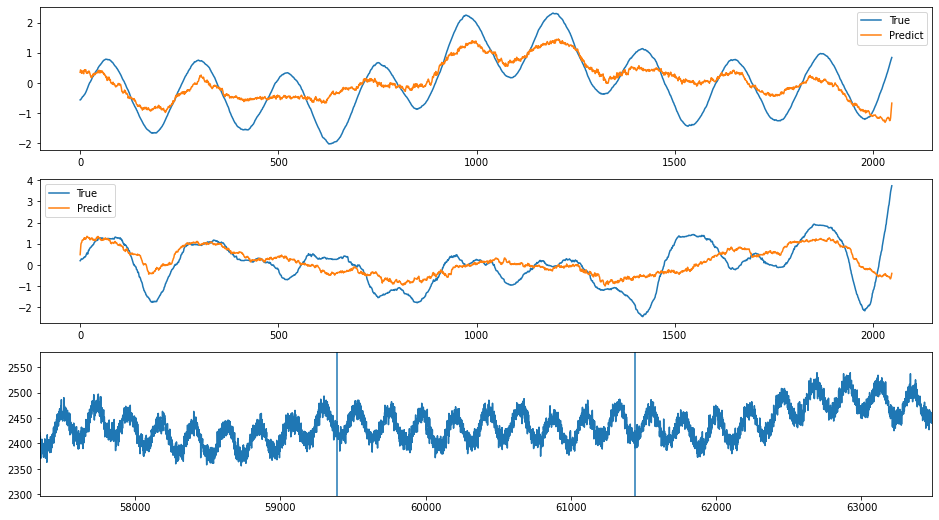

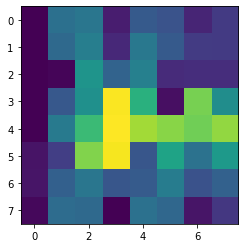

index: 77403
Error: 0.5165731429369724
type                                                         Inst
fill                                                         7467
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-23 08:34:21
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7467/...
n_bunches                                                     271
bunch_index                                                   327
bunch_number                                                   67
ts_length                                                   65536
chunk                                                           9
Name: 2429, dtype: object


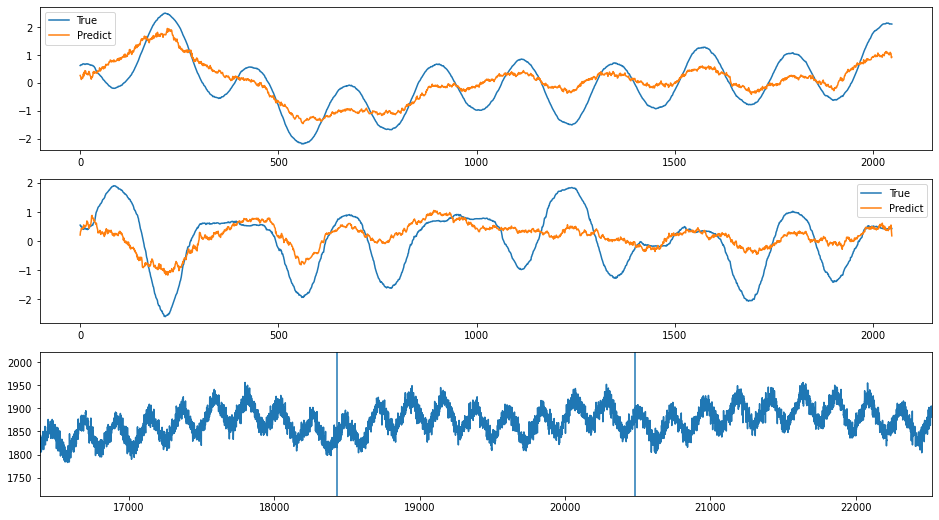

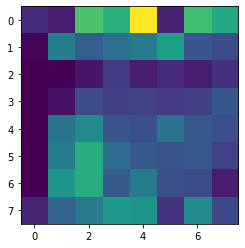

index: 182273
Error: 0.5139951772518407
type                                                         Inst
fill                                                         7127
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-05 12:57:45
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7127/...
n_bunches                                                    1212
bunch_index                                                   255
bunch_number                                                  161
ts_length                                                   65536
chunk                                                          26
Name: 6749, dtype: object


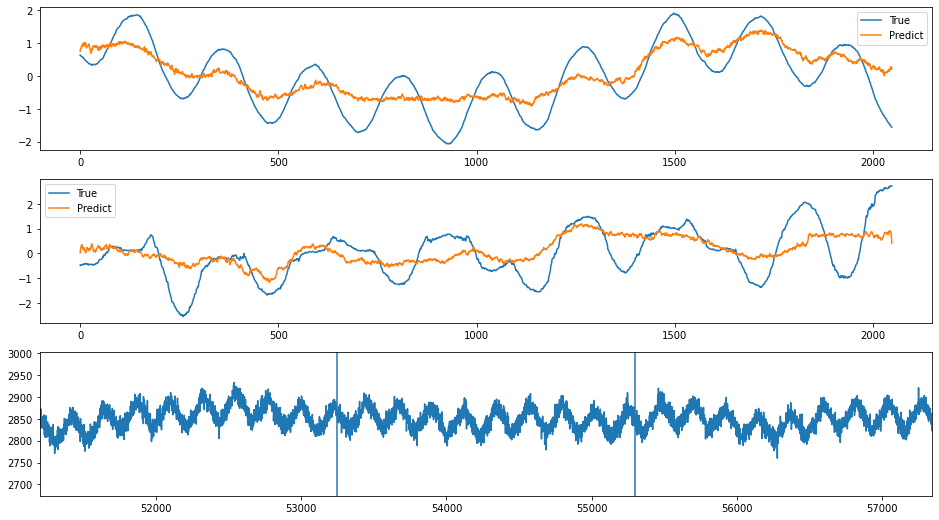

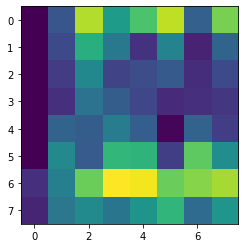

index: 192729
Error: 0.5136074617543084
type                                                         Inst
fill                                                         6192
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-12 17:09:26
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6192/...
n_bunches                                                     180
bunch_index                                                   197
bunch_number                                                   92
ts_length                                                   65536
chunk                                                           5
Name: 1334, dtype: object


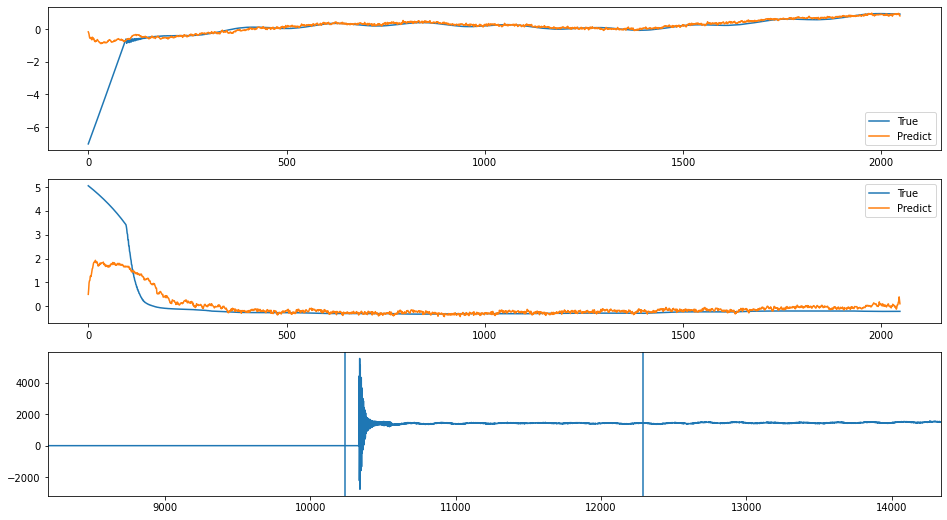

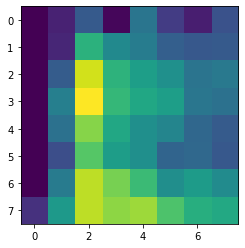

index: 155909
Error: 0.4965523983360237
type                                                         Inst
fill                                                         6390
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-15 15:37:59
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6390/...
n_bunches                                                     876
bunch_index                                                  1536
bunch_number                                                  801
ts_length                                                   65536
chunk                                                           4
Name: 1256, dtype: object


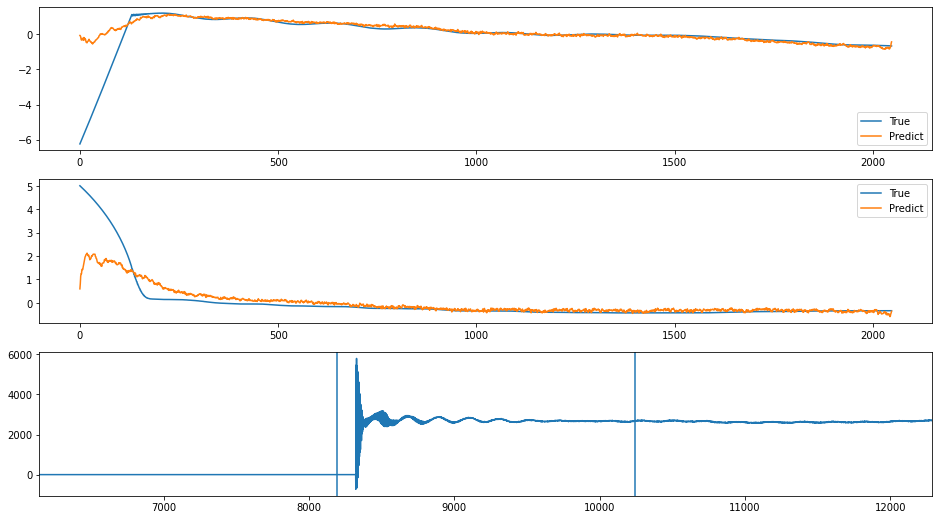

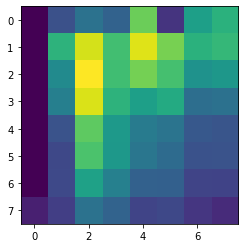

index: 65713
Error: 0.489603384823642
type                                                         Inst
fill                                                         6278
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 23:02:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6278/...
n_bunches                                                     780
bunch_index                                                  1285
bunch_number                                                  688
ts_length                                                   65536
chunk                                                           5
Name: 1362, dtype: object


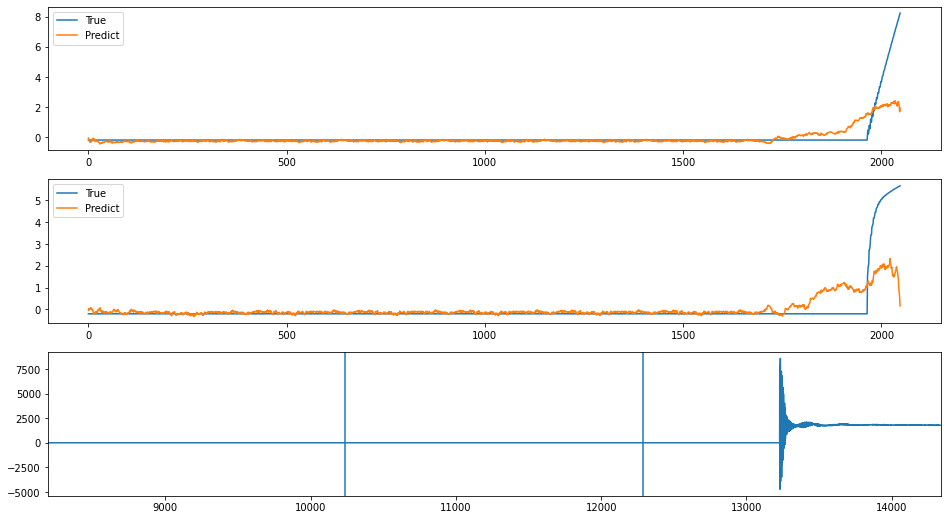

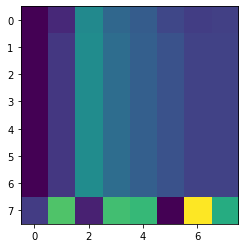

index: 141414
Error: 0.4787319758929274
type                                                         Inst
fill                                                         6989
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 06:59:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6989/...
n_bunches                                                     300
bunch_index                                                   337
bunch_number                                                  140
ts_length                                                   65536
chunk                                                           5
Name: 1347, dtype: object


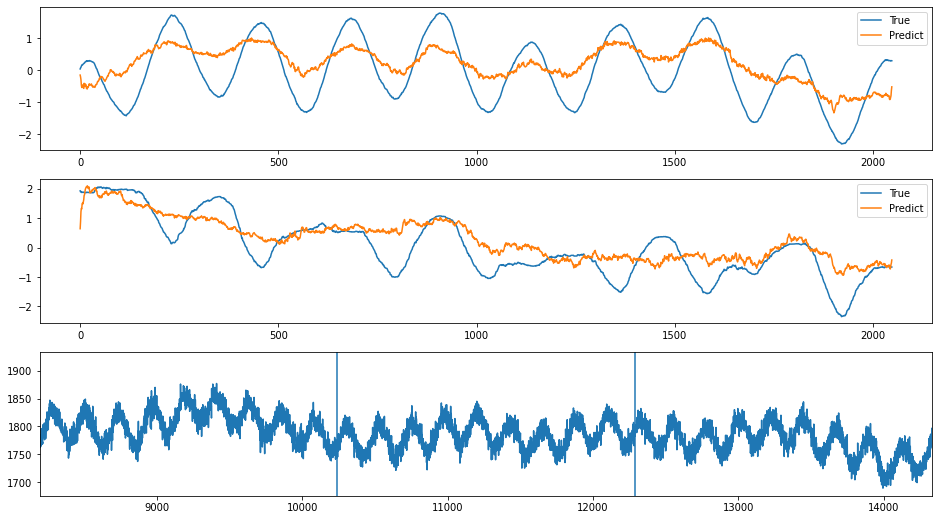

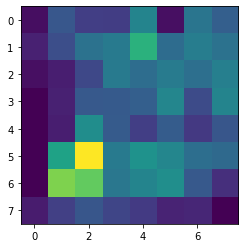

index: 129318
Error: 0.4780061634577311
type                                                         Inst
fill                                                         6413
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-23 19:27:25
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6413/...
n_bunches                                                     300
bunch_index                                                   526
bunch_number                                                  285
ts_length                                                   65536
chunk                                                           5
Name: 1422, dtype: object


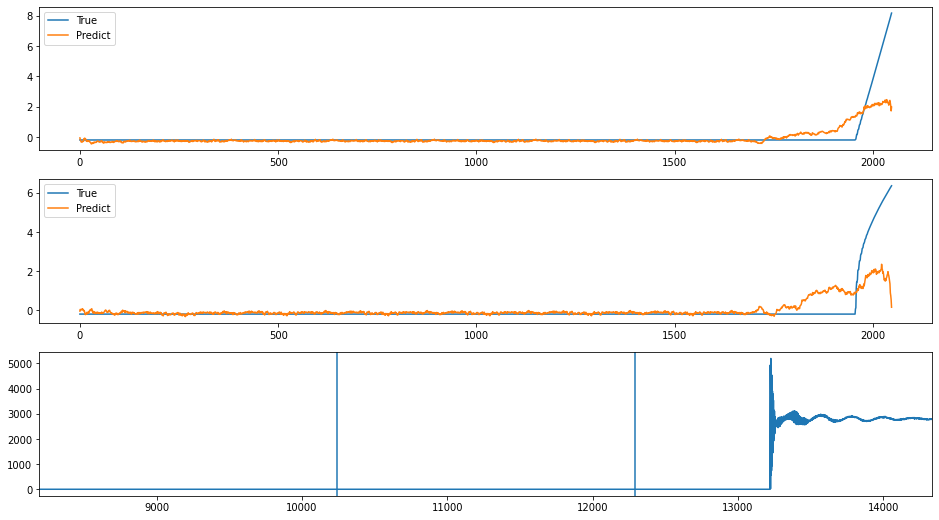

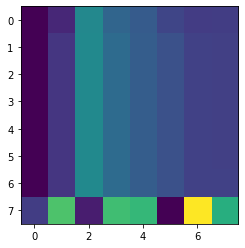

index: 219066
Error: 0.4756268652408592
type                                                         Inst
fill                                                         6710
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-21 12:30:08
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6710/...
n_bunches                                                     540
bunch_index                                                   613
bunch_number                                                  417
ts_length                                                   65536
chunk                                                          11
Name: 2875, dtype: object


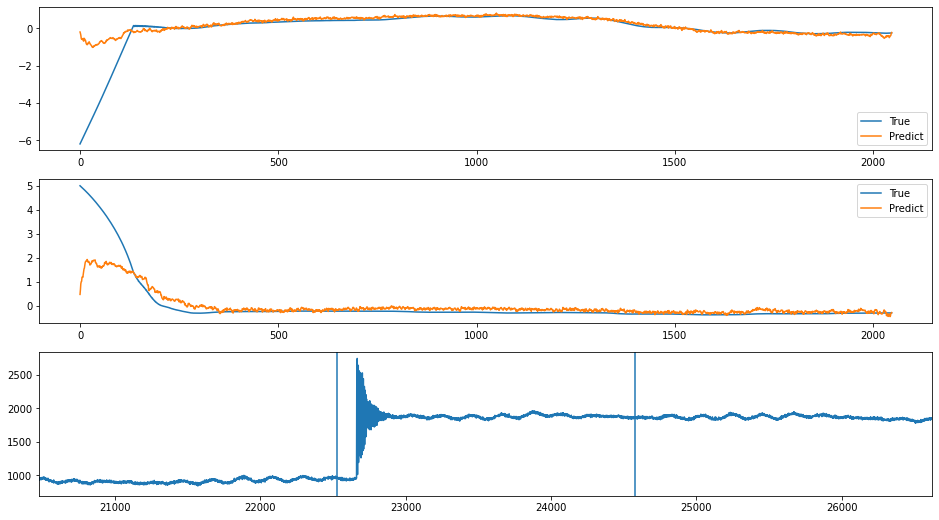

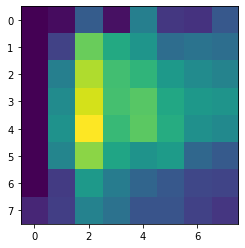

index: 241414
Error: 0.474742953437835
type                                                         Inst
fill                                                         6687
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 15:50:32
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6687/...
n_bunches                                                     252
bunch_index                                                   103
bunch_number                                                   35
ts_length                                                   65536
chunk                                                           2
Name: 765, dtype: object


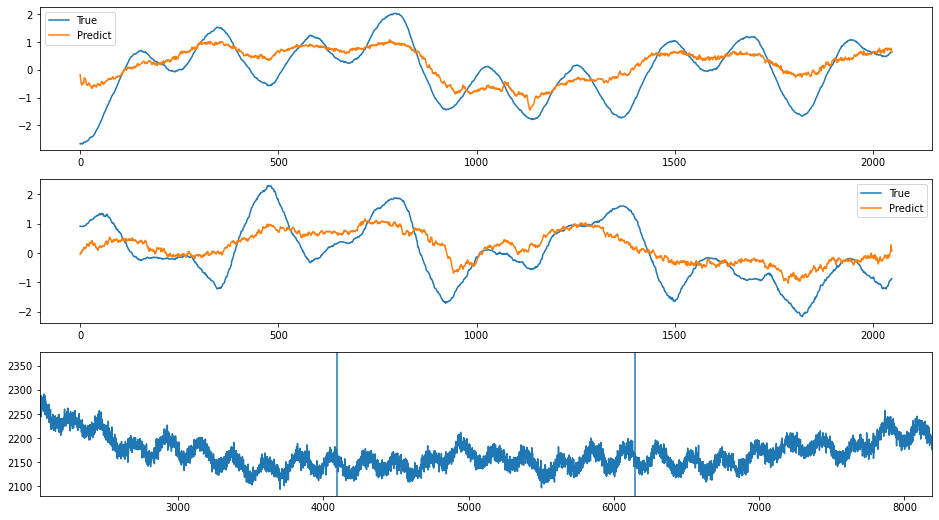

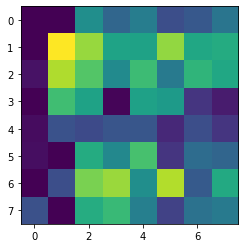

index: 52206
Error: 0.4574076209850352
type                                                         Inst
fill                                                         7240
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-30 20:45:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7240/...
n_bunches                                                     636
bunch_index                                                   442
bunch_number                                                  303
ts_length                                                   65536
chunk                                                          19
Name: 5066, dtype: object


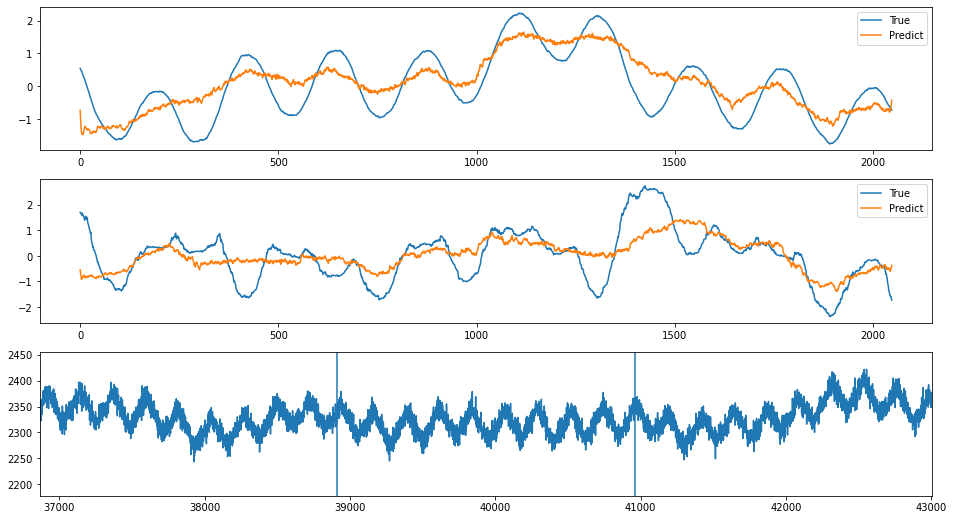

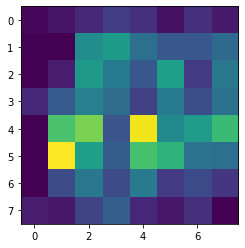

index: 34982
Error: 0.4478348503618211
type                                                         Inst
fill                                                         7299
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-14 02:43:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7299/...
n_bunches                                                     152
bunch_index                                                  1704
bunch_number                                                   74
ts_length                                                   65536
chunk                                                          18
Name: 4860, dtype: object


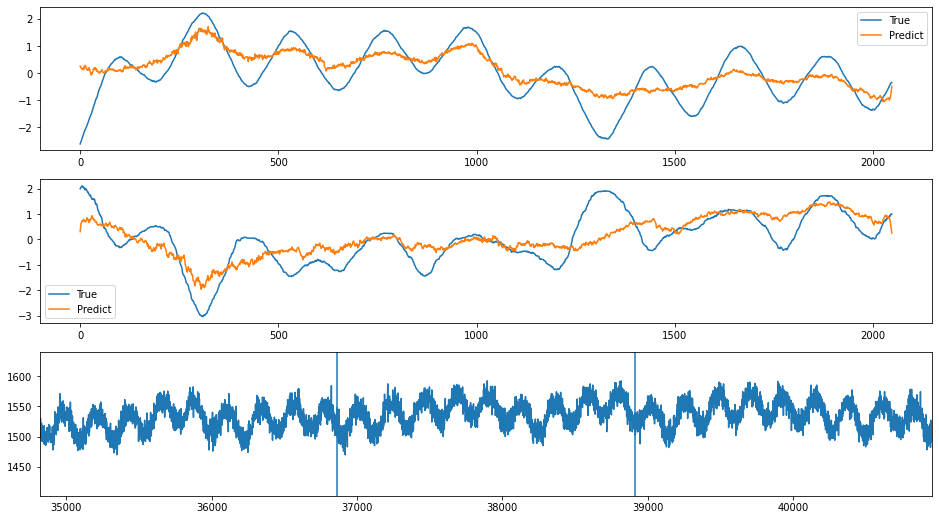

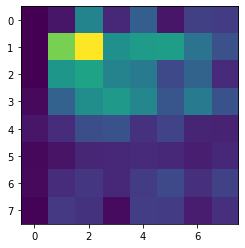

index: 33063
Error: 0.44624834273928343
type                                                         Inst
fill                                                         6343
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-28 06:46:19
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6343/...
n_bunches                                                     524
bunch_index                                                   263
bunch_number                                                  137
ts_length                                                   65536
chunk                                                           0
Name: 249, dtype: object


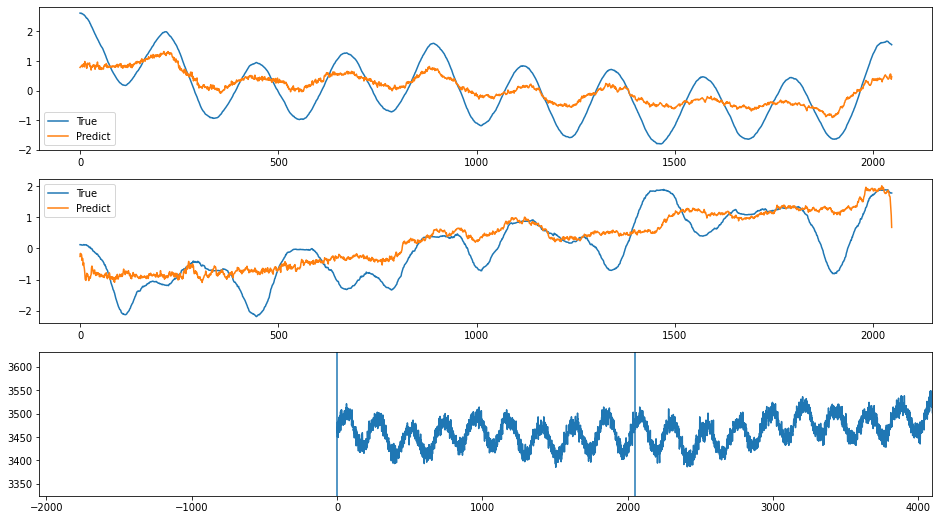

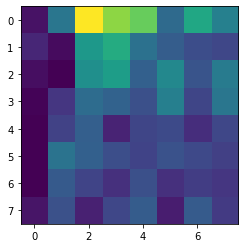

index: 76993
Error: 0.4461495782589735
type                                                         Inst
fill                                                         7384
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 02:43:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7384/...
n_bunches                                                     108
bunch_index                                                    65
bunch_number                                                   16
ts_length                                                   65536
chunk                                                          11
Name: 3020, dtype: object


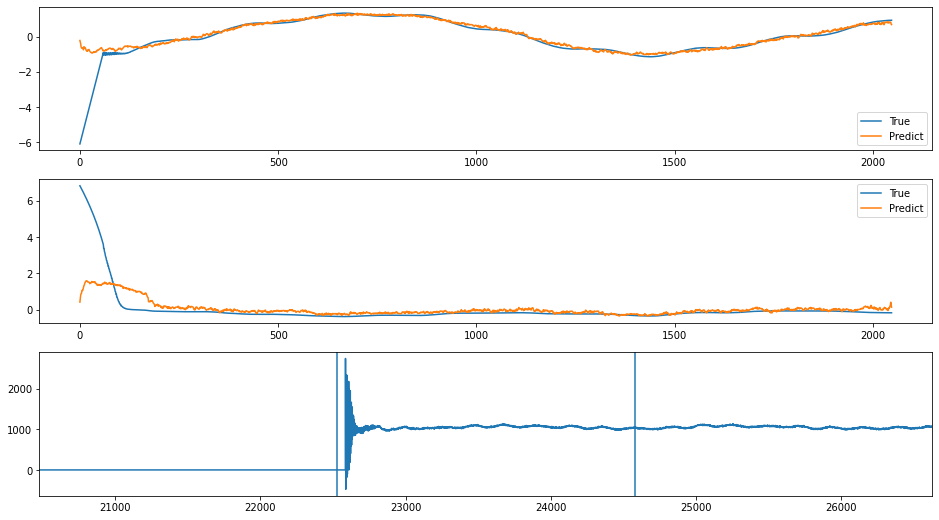

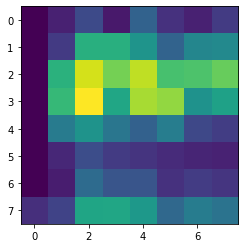

index: 277103
Error: 0.4461328851902152
type                                                         Inst
fill                                                         6757
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-04 04:21:32
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6757/...
n_bunches                                                     924
bunch_index                                                   995
bunch_number                                                  705
ts_length                                                   65536
chunk                                                          12
Name: 3244, dtype: object


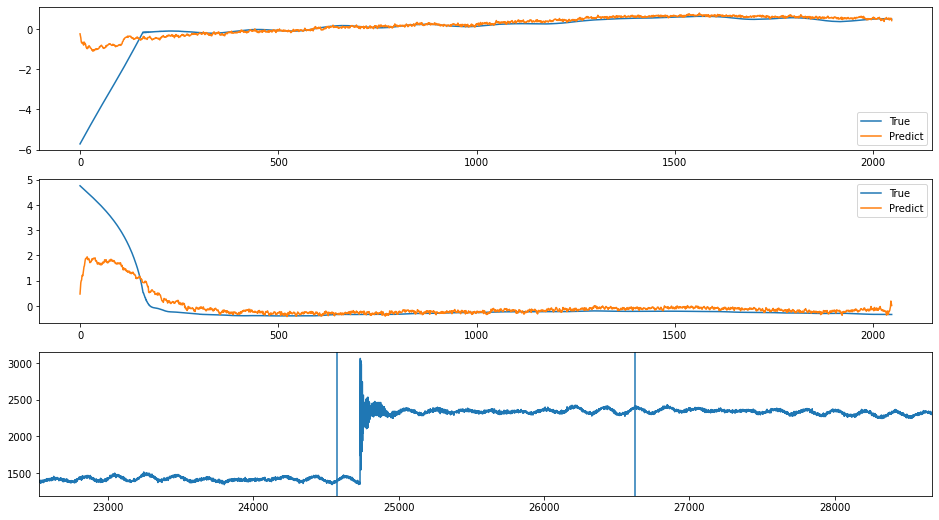

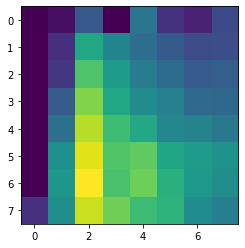

index: 327461
Error: 0.44267960111536653
type                                                         Inst
fill                                                         6275
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 19:54:51
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6275/...
n_bunches                                                    1740
bunch_index                                                  2456
bunch_number                                                 1326
ts_length                                                   65536
chunk                                                          16
Name: 4143, dtype: object


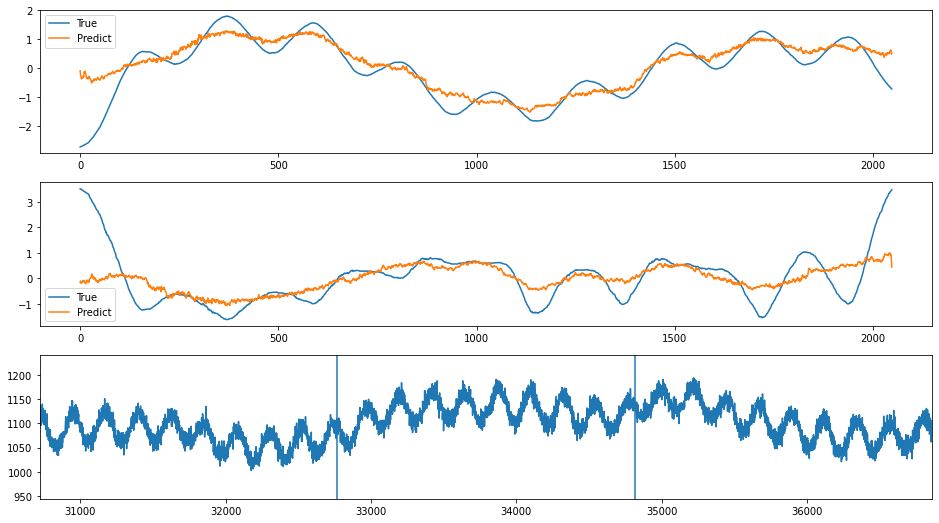

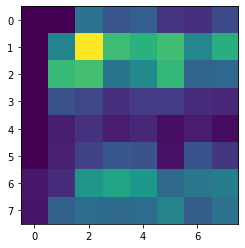

index: 378988
Error: 0.43965888789025587
type                                                         Inst
fill                                                         7334
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-23 15:06:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7334/...
n_bunches                                                     396
bunch_index                                                   518
bunch_number                                                  372
ts_length                                                   65536
chunk                                                          10
Name: 2716, dtype: object


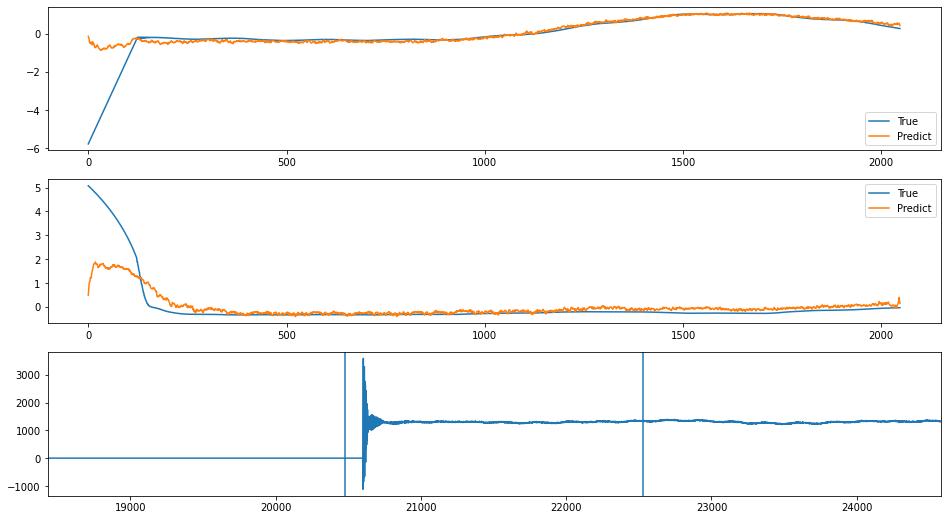

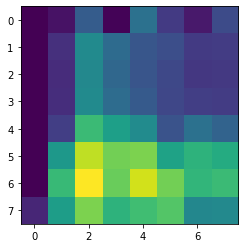

index: 62602
Error: 0.4381207910822145
type                                                         Inst
fill                                                         7065
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-19 08:29:03
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7065/...
n_bunches                                                     540
bunch_index                                                   419
bunch_number                                                  287
ts_length                                                   65536
chunk                                                           8
Name: 2159, dtype: object


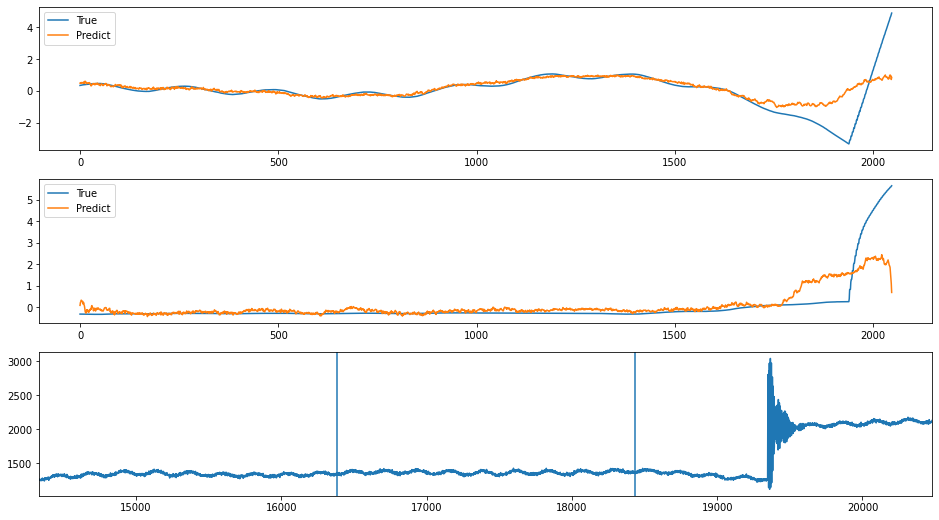

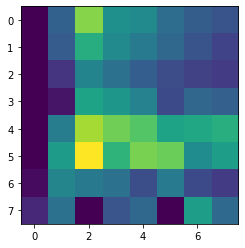

index: 316162
Error: 0.43649799330377476
type                                                         Inst
fill                                                         6284
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 16:36:27
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6284/...
n_bunches                                                     300
bunch_index                                                   515
bunch_number                                                  278
ts_length                                                   65536
chunk                                                           5
Name: 1492, dtype: object


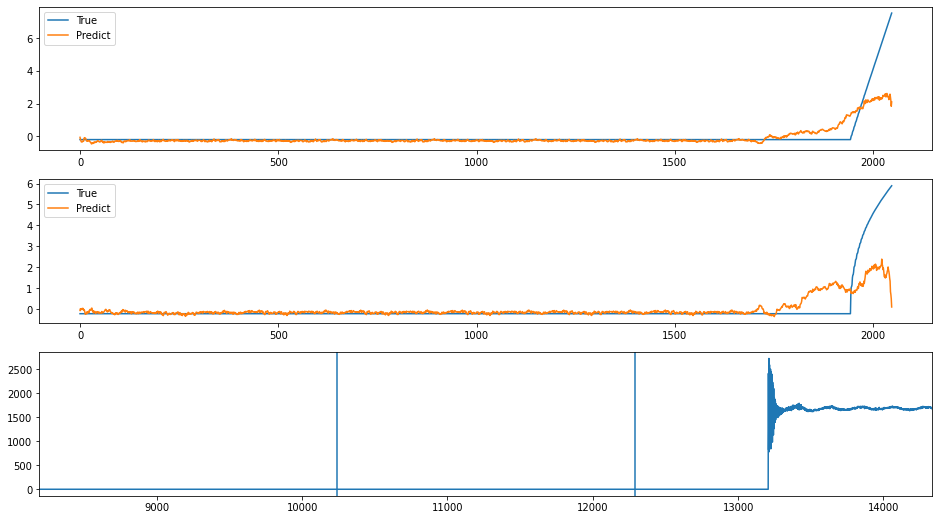

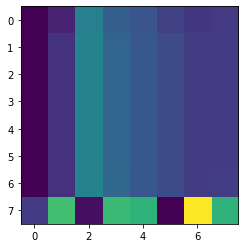

index: 9057
Error: 0.4343090740378495
type                                                         Inst
fill                                                         7052
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-13 13:03:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7052/...
n_bunches                                                     396
bunch_index                                                   196
bunch_number                                                  109
ts_length                                                   65536
chunk                                                          29
Name: 7466, dtype: object


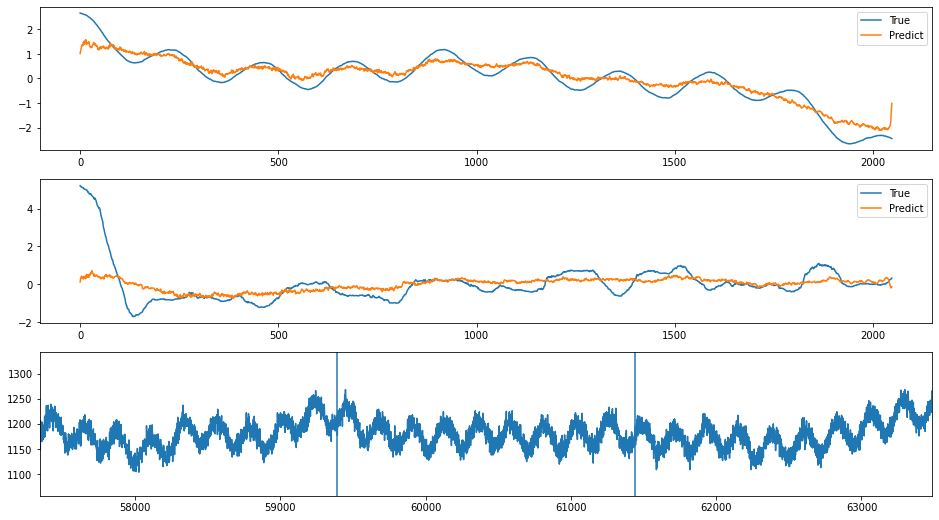

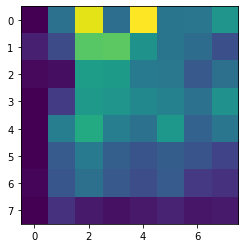

index: 307319
Error: 0.4291047578715536
type                                                         Inst
fill                                                         6666
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-10 21:59:42
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6666/...
n_bunches                                                     396
bunch_index                                                   119
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          12
Name: 3118, dtype: object


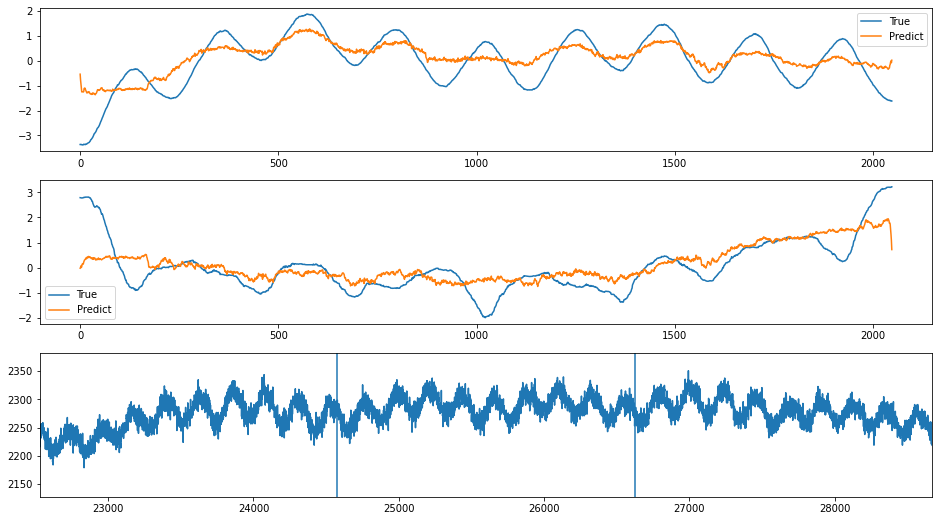

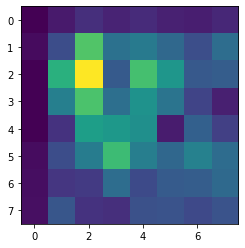

index: 73405
Error: 0.42840000670976613
type                                                         Inst
fill                                                         7299
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-14 06:32:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7299/...
n_bunches                                                     152
bunch_index                                                   809
bunch_number                                                   34
ts_length                                                   65536
chunk                                                          27
Name: 7052, dtype: object


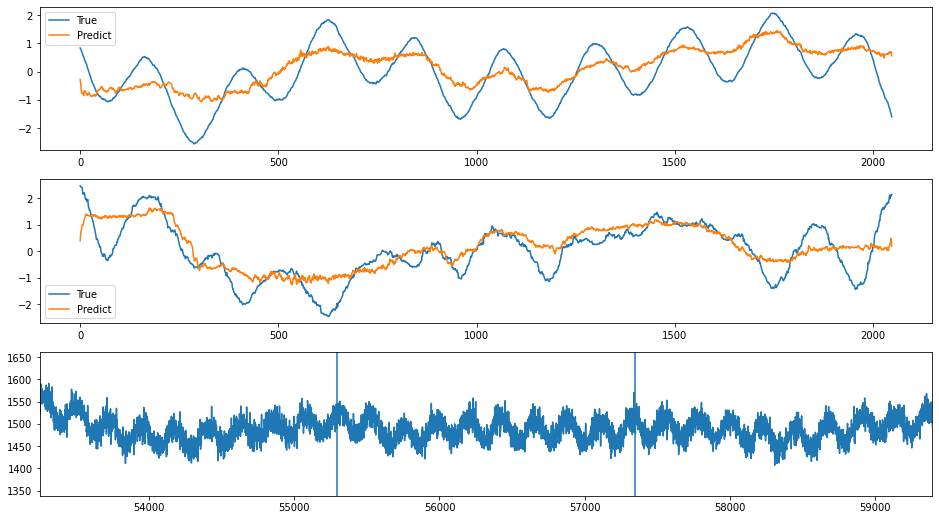

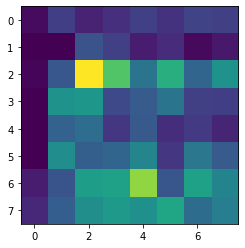

index: 279390
Error: 0.4254851690788282
type                                                         Inst
fill                                                         6577
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-19 21:30:06
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6577/...
n_bunches                                                     444
bunch_index                                                   368
bunch_number                                                  272
ts_length                                                   65536
chunk                                                           0
Name: 195, dtype: object


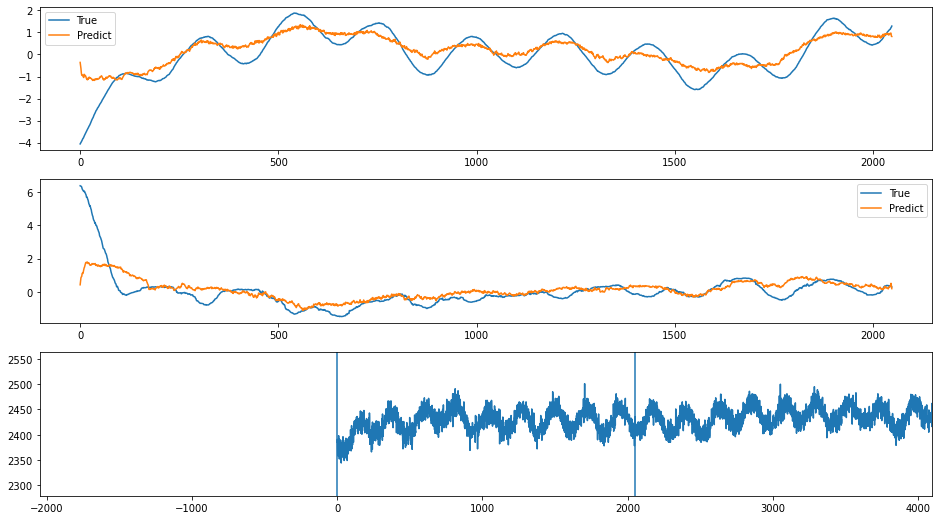

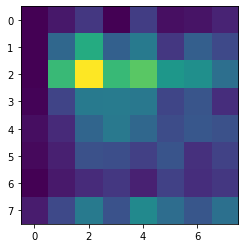

index: 343731
Error: 0.42354538115301
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-13 05:36:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                     108
bunch_index                                                   132
bunch_number                                                   76
ts_length                                                   65536
chunk                                                          11
Name: 3016, dtype: object


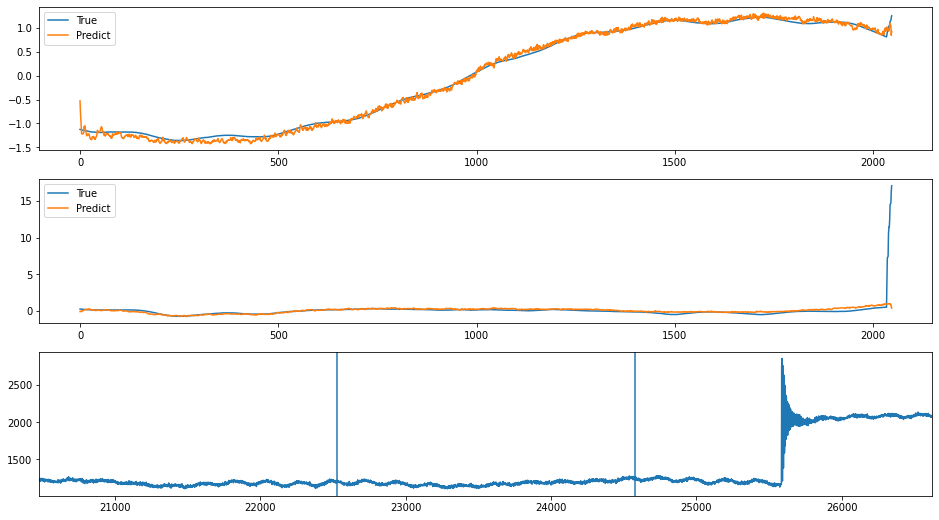

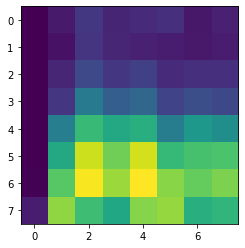

index: 180004
Error: 0.42304929317286555
type                                                         Inst
fill                                                         6215
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-17 00:53:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6215/...
n_bunches                                                    2556
bunch_index                                                  2055
bunch_number                                                 1523
ts_length                                                   65536
chunk                                                          13
Name: 3563, dtype: object


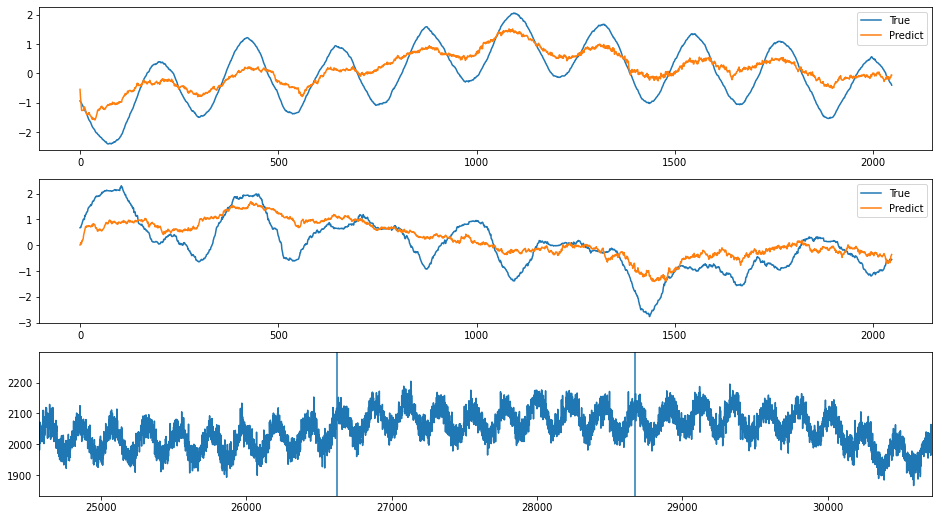

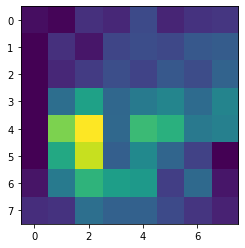

index: 313267
Error: 0.42065380814300135
type                                                         Inst
fill                                                         6273
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 18:08:06
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6273/...
n_bunches                                                     196
bunch_index                                                   171
bunch_number                                                   76
ts_length                                                   65536
chunk                                                          25
Name: 6456, dtype: object


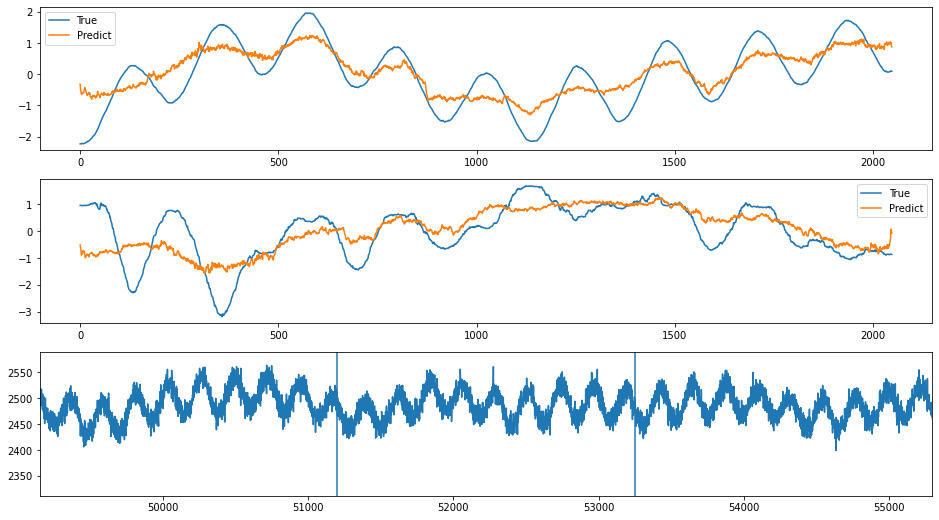

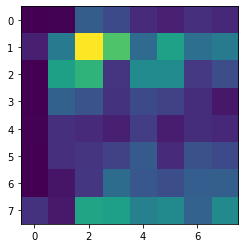

index: 314906
Error: 0.42000544807587803
type                                                         Inst
fill                                                         7253
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-03 14:53:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7253/...
n_bunches                                                     252
bunch_index                                                   328
bunch_number                                                  227
ts_length                                                   65536
chunk                                                          11
Name: 2911, dtype: object


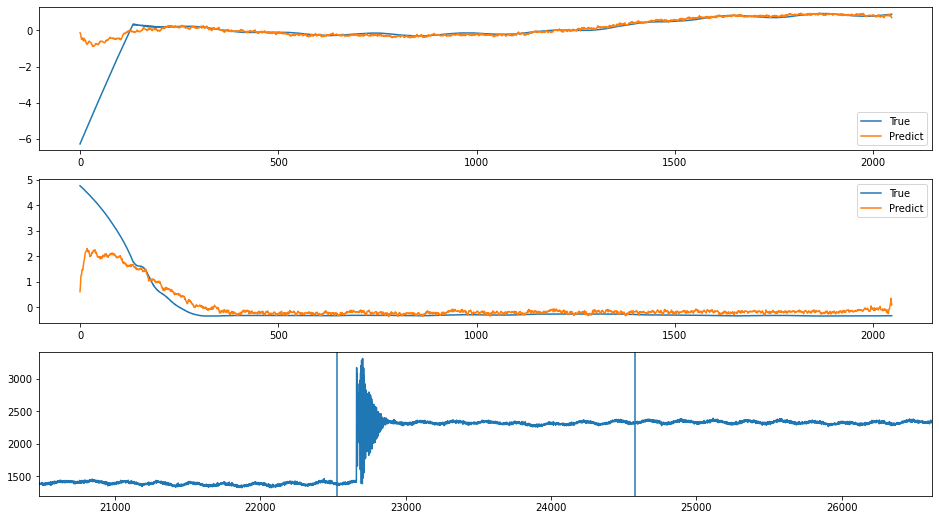

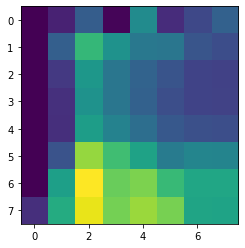

index: 333501
Error: 0.41800766397021144
type                                                         Inst
fill                                                         6220
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-17 23:25:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6220/...
n_bunches                                                     228
bunch_index                                                  2810
bunch_number                                                  214
ts_length                                                   65536
chunk                                                          23
Name: 6052, dtype: object


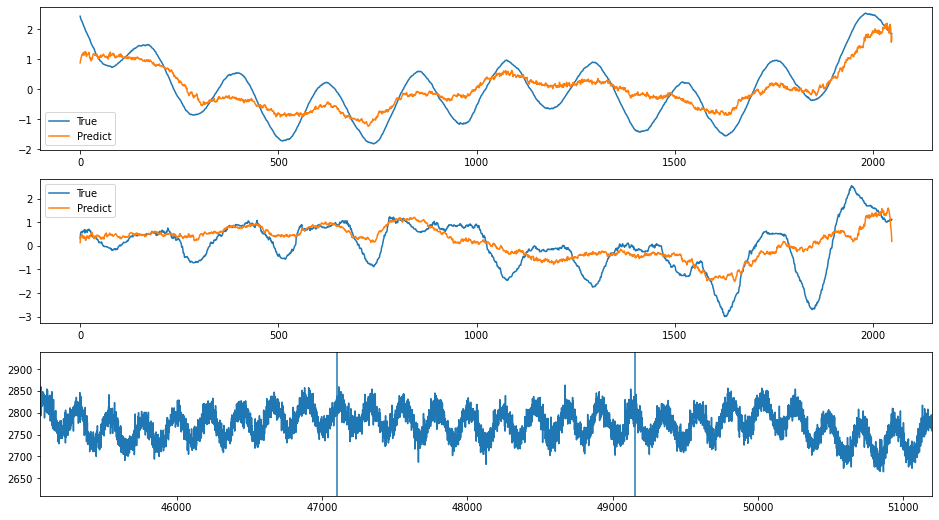

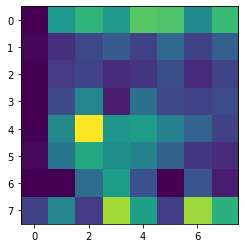

index: 12478
Error: 0.41746360964780704
type                                                         Inst
fill                                                         6184
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-09 23:55:53
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6184/...
n_bunches                                                    1412
bunch_index                                                  2261
bunch_number                                                 1247
ts_length                                                   65536
chunk                                                           5
Name: 1495, dtype: object


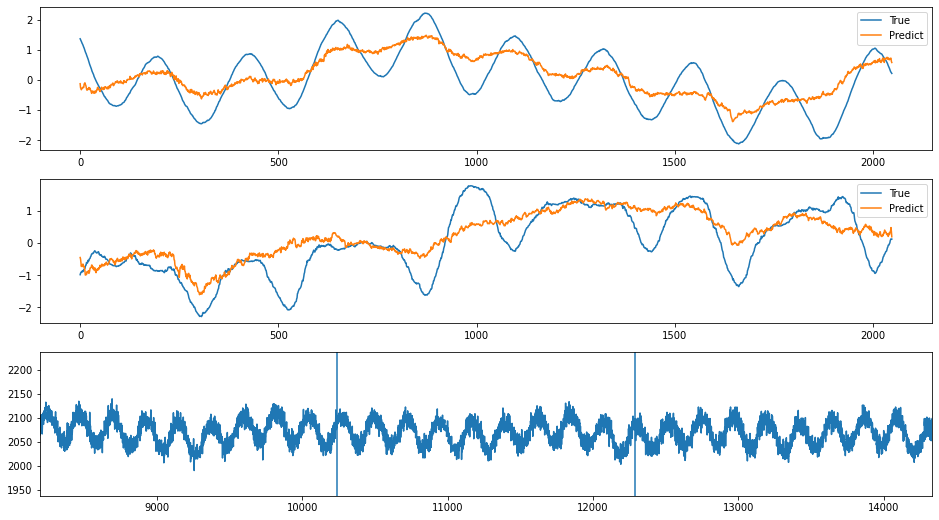

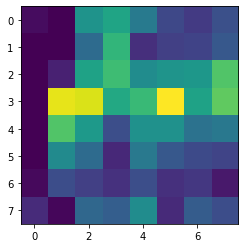

index: 390983
Error: 0.41682443422195026
type                                                         Inst
fill                                                         7099
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-29 15:01:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7099/...
n_bunches                                                     396
bunch_index                                                   538
bunch_number                                                  392
ts_length                                                   65536
chunk                                                          27
Name: 7088, dtype: object


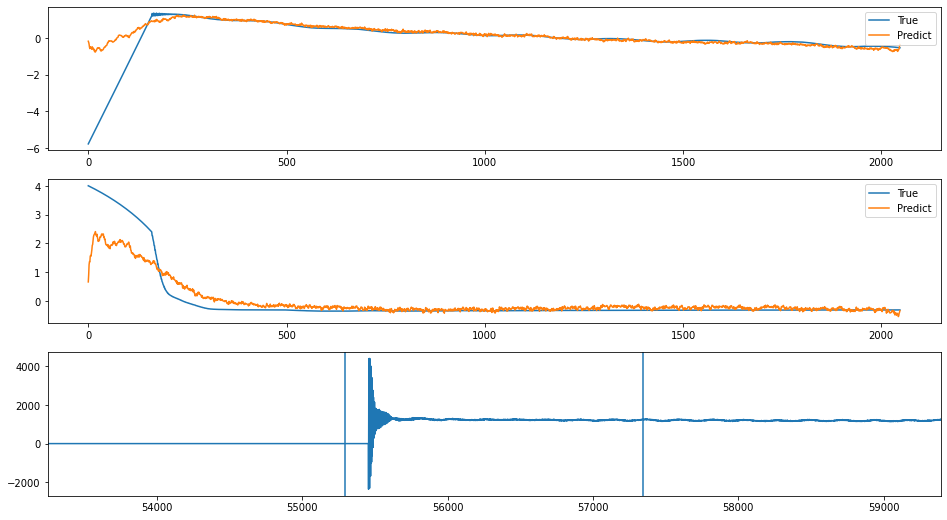

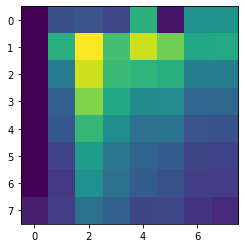

index: 302146
Error: 0.4159207852071688
type                                                         Inst
fill                                                         7441
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-13 05:36:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7441/...
n_bunches                                                     268
bunch_index                                                  1015
bunch_number                                                  185
ts_length                                                   65536
chunk                                                           3
Name: 871, dtype: object


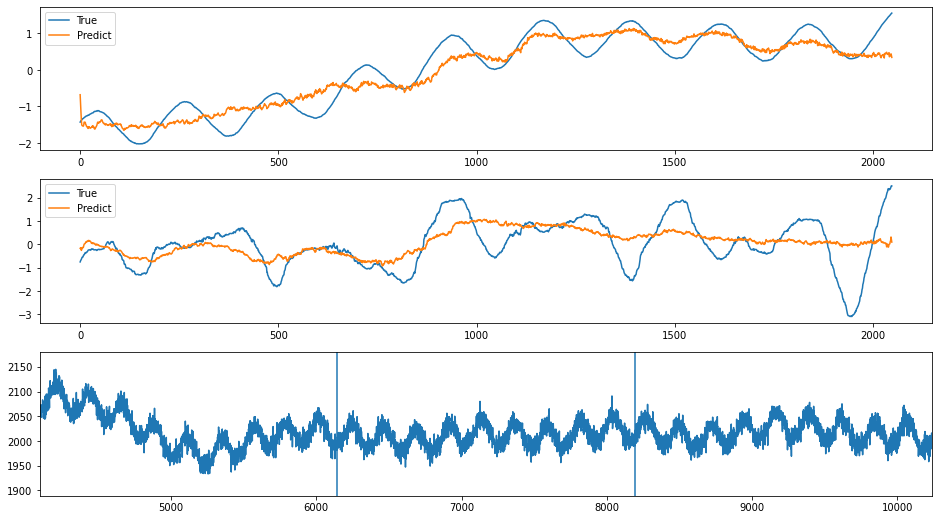

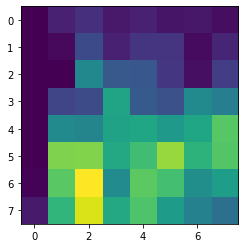

index: 210904
Error: 0.41511976032999925
type                                                         Inst
fill                                                         7299
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-14 04:16:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7299/...
n_bunches                                                     152
bunch_index                                                  2978
bunch_number                                                  131
ts_length                                                   65536
chunk                                                           1
Name: 282, dtype: object


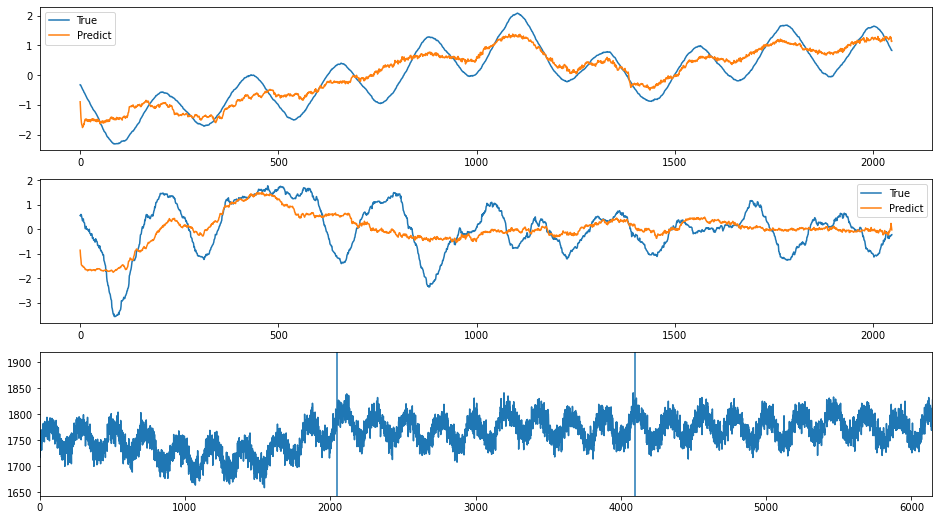

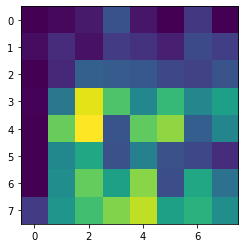

index: 348284
Error: 0.4143900576716082
type                                                         Inst
fill                                                         6379
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-11 18:11:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6379/...
n_bunches                                                       2
bunch_index                                                     0
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          20
Name: 5149, dtype: object


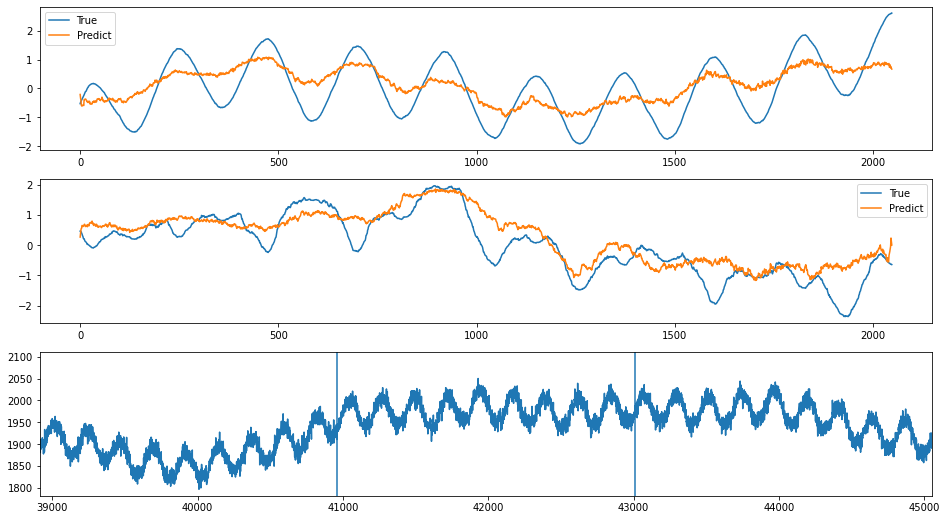

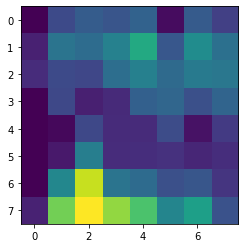

index: 152838
Error: 0.41032748811676467
type                                                         Inst
fill                                                         6220
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-17 23:21:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6220/...
n_bunches                                                     228
bunch_index                                                  2698
bunch_number                                                  193
ts_length                                                   65536
chunk                                                          15
Name: 3890, dtype: object


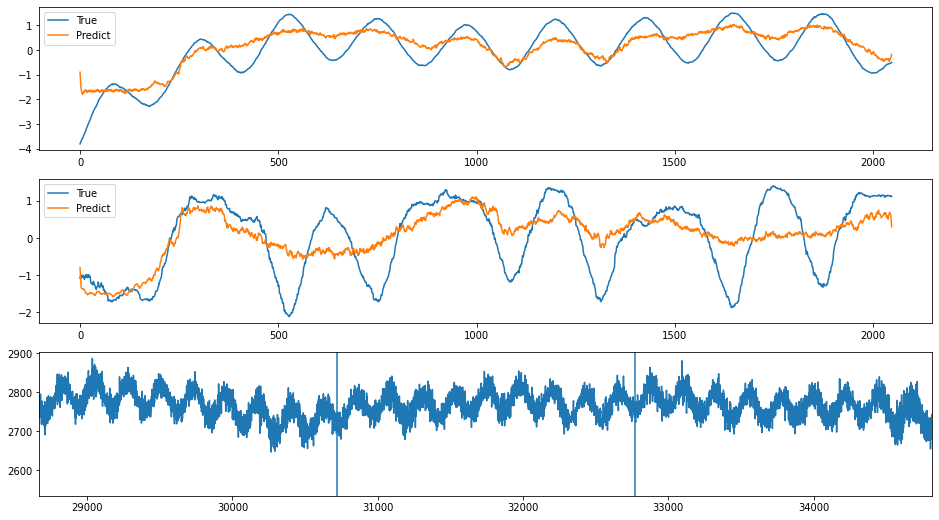

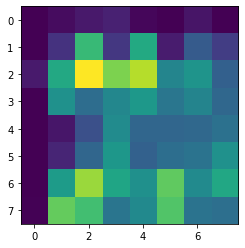

index: 290357
Error: 0.40955228379461484
type                                                         Inst
fill                                                         6405
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-21 21:29:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6405/...
n_bunches                                                     780
bunch_index                                                   476
bunch_number                                                  254
ts_length                                                   65536
chunk                                                          29
Name: 7643, dtype: object


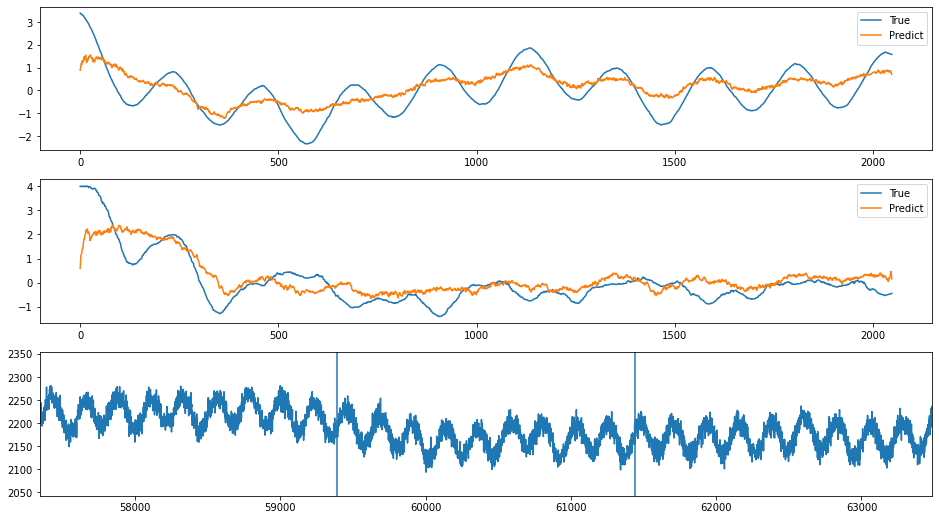

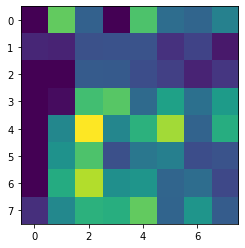

index: 168869
Error: 0.4093623097096293
type                                                         Inst
fill                                                         6215
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-16 23:40:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6215/...
n_bunches                                                    1740
bunch_index                                                  1273
bunch_number                                                  925
ts_length                                                   65536
chunk                                                          12
Name: 3166, dtype: object


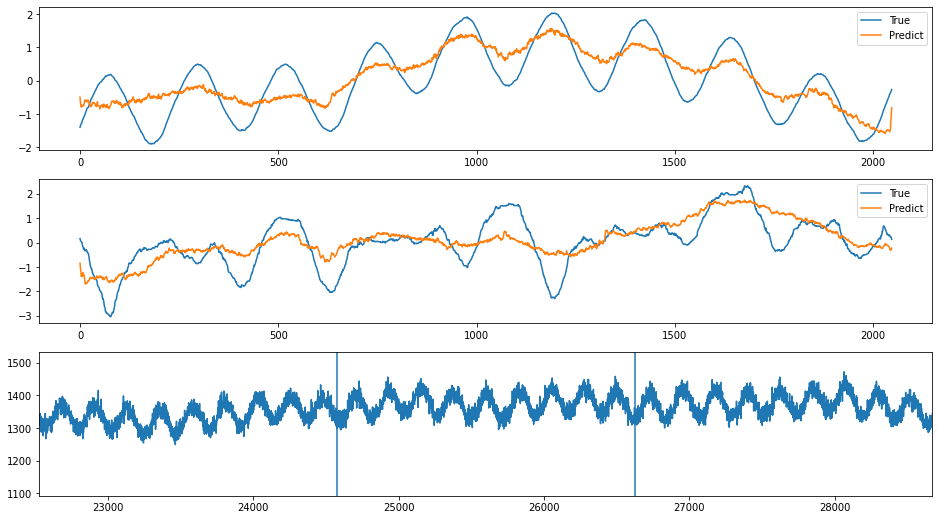

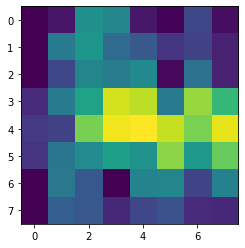

index: 324176
Error: 0.40704527072962615
type                                                         Inst
fill                                                         7061
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-17 22:13:10
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7061/...
n_bunches                                                     924
bunch_index                                                   963
bunch_number                                                  692
ts_length                                                   65536
chunk                                                          10
Name: 2739, dtype: object


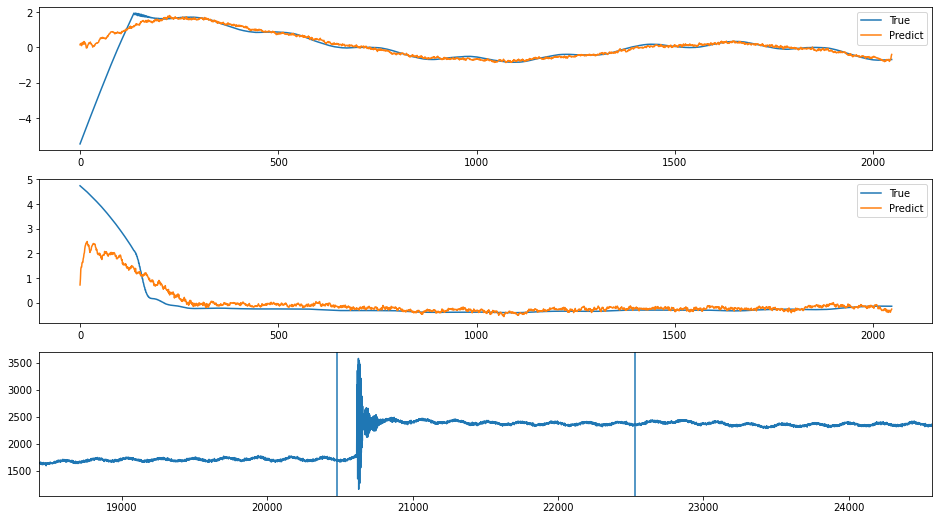

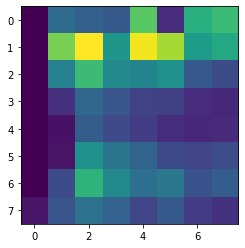

index: 265073
Error: 0.4069656770136372
type                                                         Inst
fill                                                         7037
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-08 02:44:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7037/...
n_bunches                                                     780
bunch_index                                                   100
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          29
Name: 7424, dtype: object


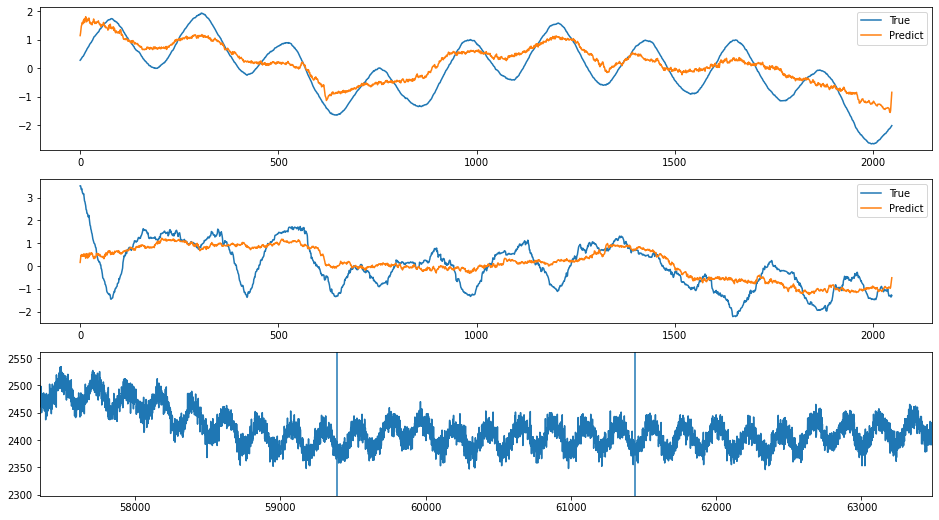

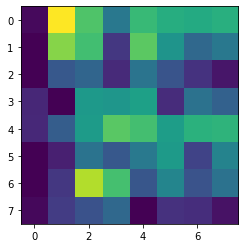

index: 120396
Error: 0.4060727810701124
type                                                         Inst
fill                                                         6275
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 19:48:03
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6275/...
n_bunches                                                    1132
bunch_index                                                  1270
bunch_number                                                  680
ts_length                                                   65536
chunk                                                          11
Name: 2904, dtype: object


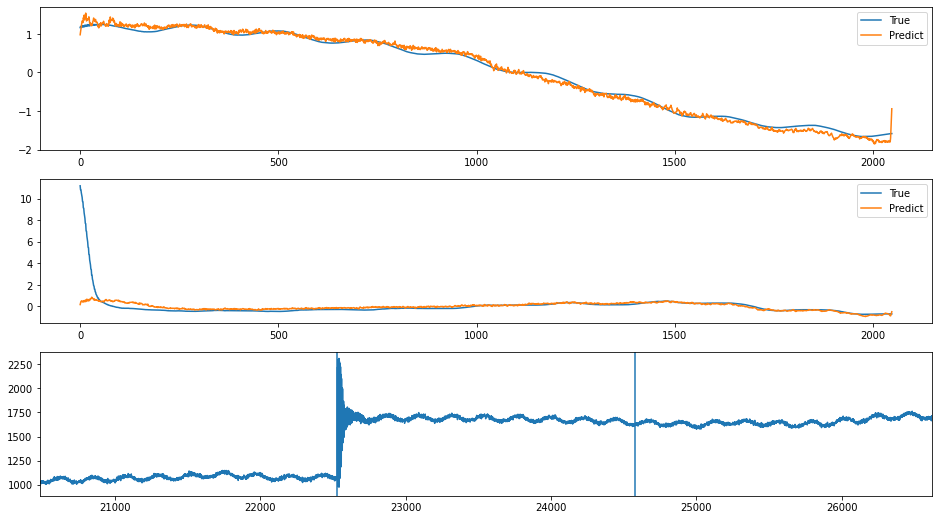

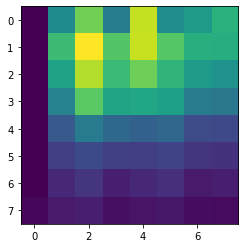

index: 154596
Error: 0.4049452805535353
type                                                         Inst
fill                                                         6275
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 19:54:51
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6275/...
n_bunches                                                    1740
bunch_index                                                   742
bunch_number                                                  405
ts_length                                                   65536
chunk                                                          16
Name: 4269, dtype: object


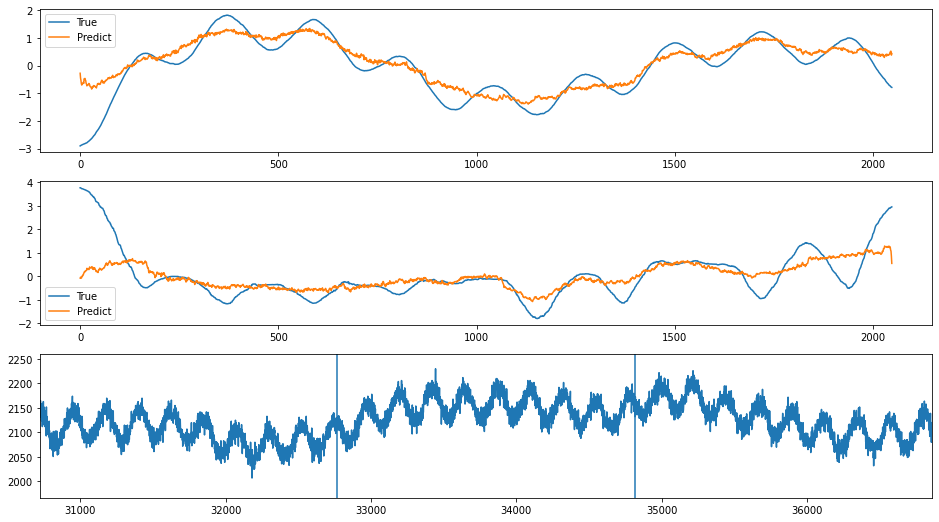

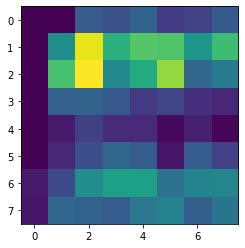

index: 327280
Error: 0.4044211251056951
type                                                         Inst
fill                                                         7454
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-18 23:34:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7454/...
n_bunches                                                     444
bunch_index                                                   733
bunch_number                                                  136
ts_length                                                   65536
chunk                                                           8
Name: 2084, dtype: object


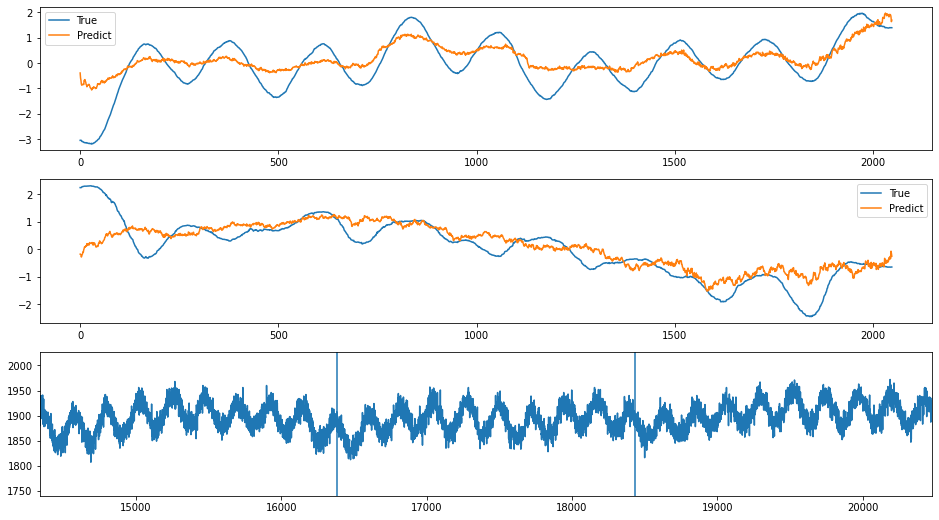

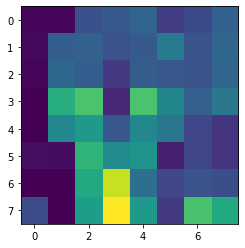

index: 161978
Error: 0.40104039381326273
type                                                         Inst
fill                                                         6613
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-26 00:33:56
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6613/...
n_bunches                                                     362
bunch_index                                                  2076
bunch_number                                                  346
ts_length                                                   65536
chunk                                                          11
Name: 2869, dtype: object


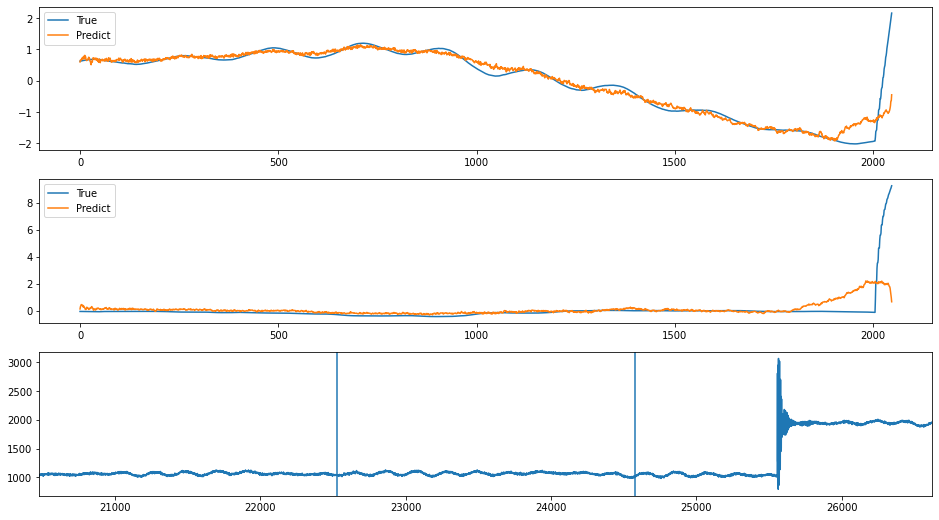

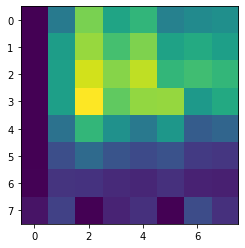

index: 119613
Error: 0.39994178157577165
type                                                         Inst
fill                                                         6340
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-27 21:53:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6340/...
n_bunches                                                    1484
bunch_index                                                   425
bunch_number                                                  222
ts_length                                                   65536
chunk                                                           1
Name: 265, dtype: object


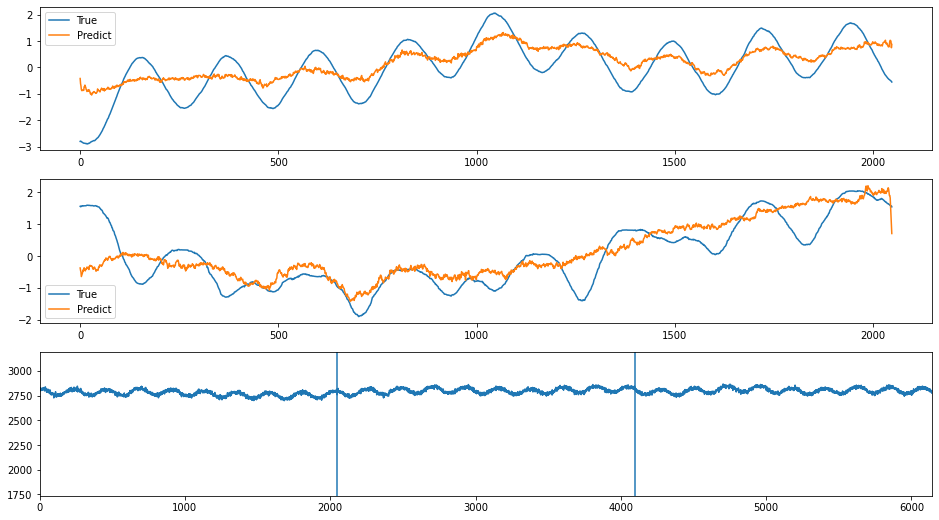

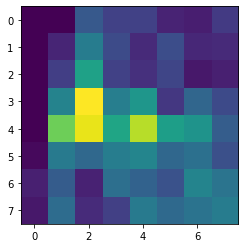

index: 303640
Error: 0.3984726967911145
type                                                         Inst
fill                                                         6347
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-30 11:03:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6347/...
n_bunches                                                     780
bunch_index                                                  1092
bunch_number                                                  583
ts_length                                                   65536
chunk                                                           3
Name: 955, dtype: object


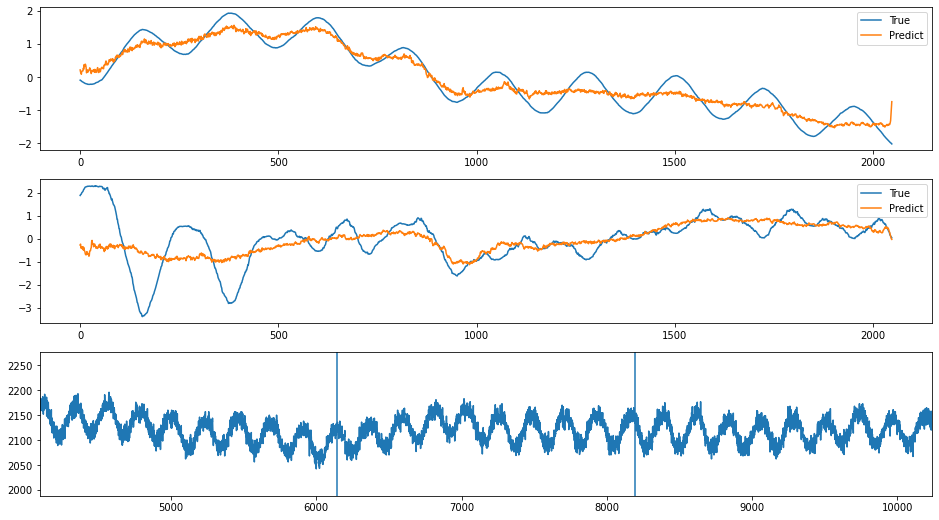

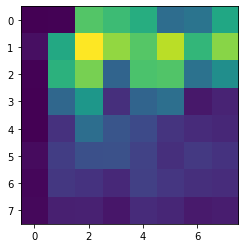

index: 162898
Error: 0.39735210151198425
type                                                         Inst
fill                                                         7481
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-28 09:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7481/...
n_bunches                                                     271
bunch_index                                                   742
bunch_number                                                  158
ts_length                                                   65536
chunk                                                          21
Name: 5438, dtype: object


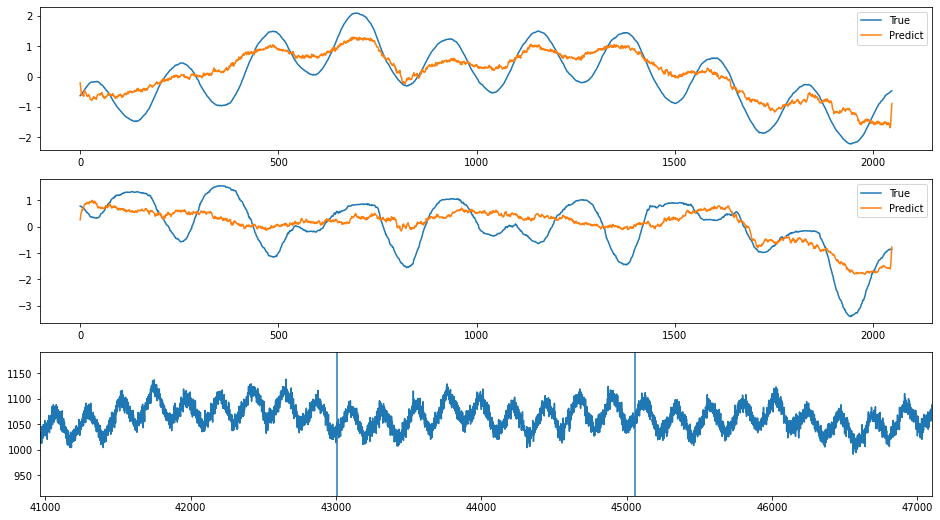

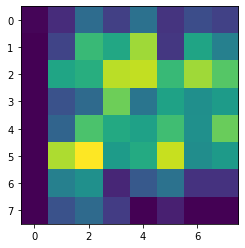

index: 154654
Error: 0.3961798788186544
type                                                         Inst
fill                                                         6183
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-09 20:16:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6183/...
n_bunches                                                    1188
bunch_index                                                  1218
bunch_number                                                  672
ts_length                                                   65536
chunk                                                          21
Name: 5474, dtype: object


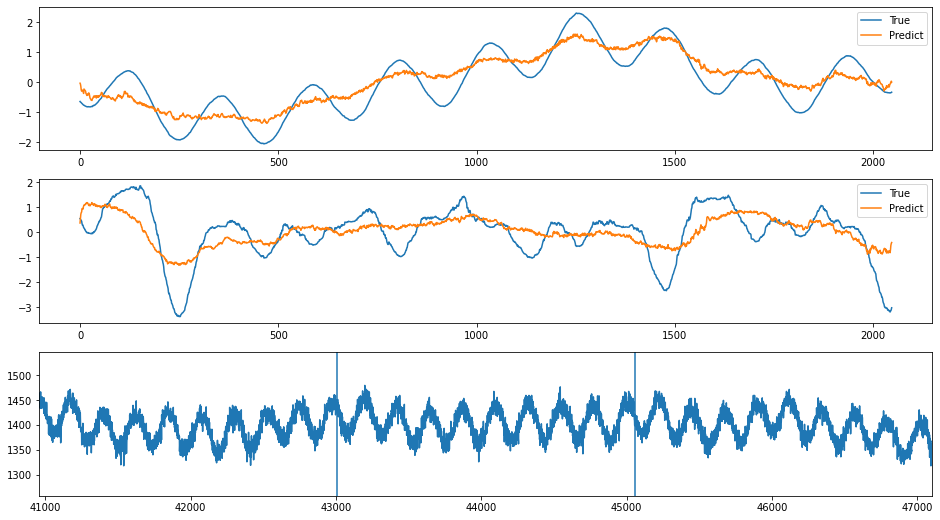

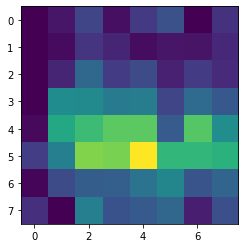

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 345387
Error: 0.012877055320773186
type                                                         Inst
fill                                                         7058
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-17 15:29:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7058/...
n_bunches                                                    2556
bunch_index                                                  2996
bunch_number                                                 2229
ts_length                                                   65536
chunk                                                           6
Name: 1682, dtype: object


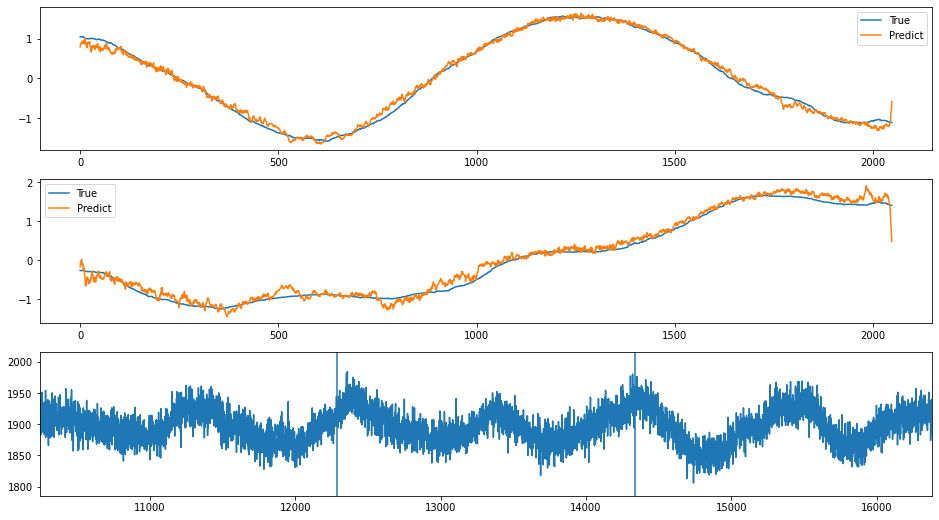

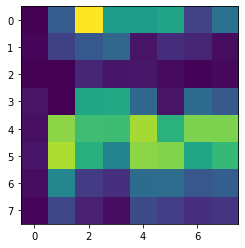

index: 51965
Error: 0.01287744458122609
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-14 01:11:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                    2556
bunch_index                                                  2321
bunch_number                                                 1731
ts_length                                                   65536
chunk                                                          12
Name: 3231, dtype: object


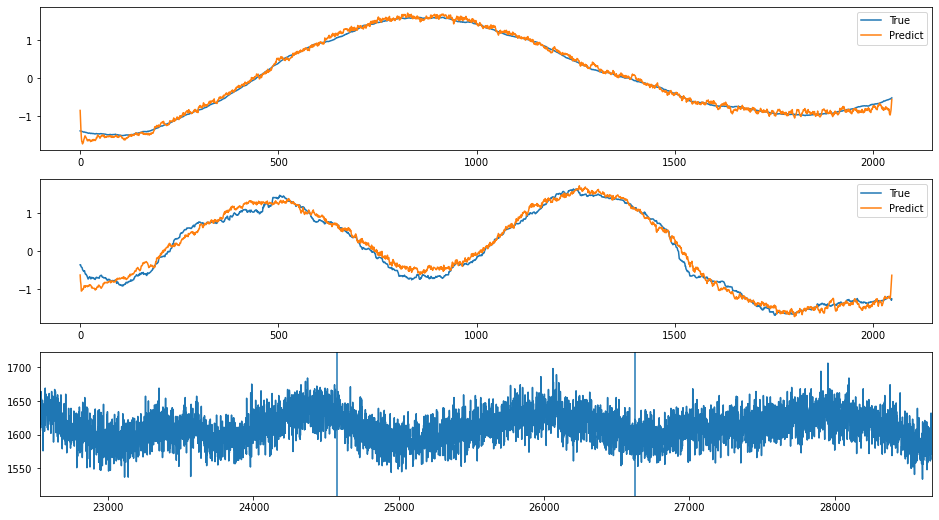

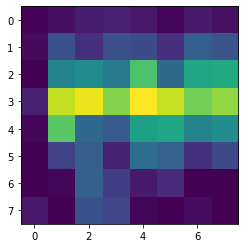

index: 110157
Error: 0.01287698461237463
type                                                         Inst
fill                                                         6786
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-13 15:26:37
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6786/...
n_bunches                                                     396
bunch_index                                                   125
bunch_number                                                   69
ts_length                                                   65536
chunk                                                          10
Name: 2585, dtype: object


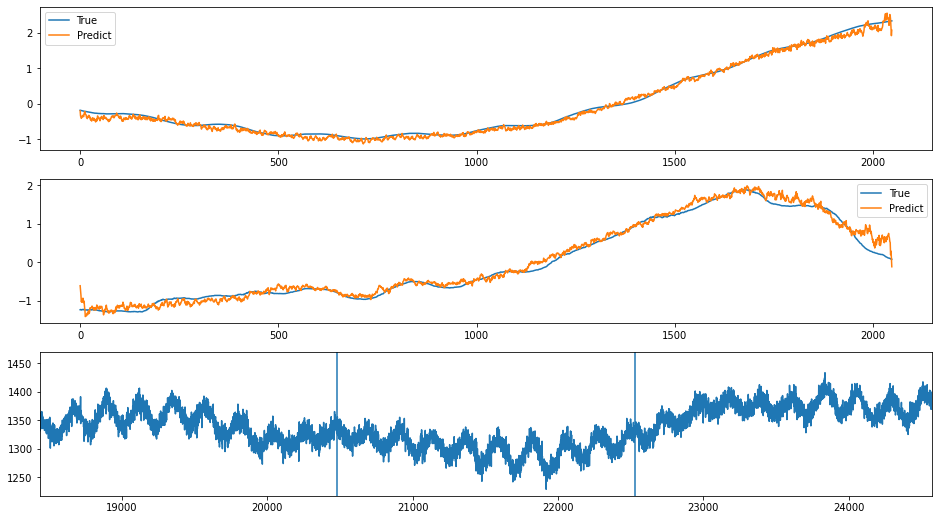

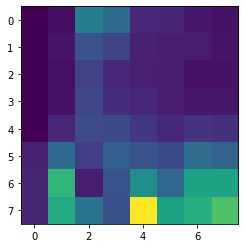

index: 340619
Error: 0.012876882867192026
type                                                         Inst
fill                                                         6759
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-05 13:03:06
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6759/...
n_bunches                                                    2556
bunch_index                                                   486
bunch_number                                                  328
ts_length                                                   65536
chunk                                                          23
Name: 5988, dtype: object


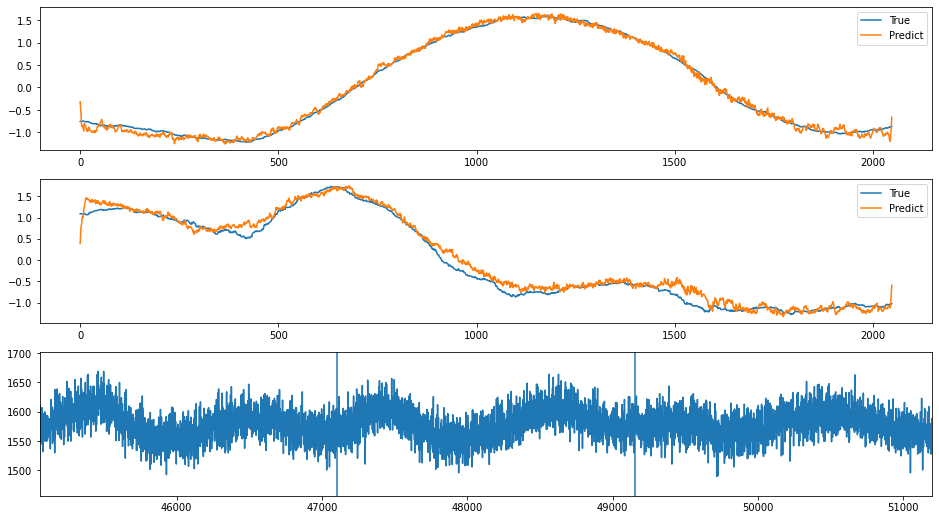

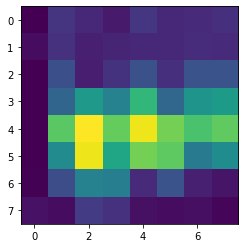

index: 236830
Error: 0.012877600028062788
type                                                         Inst
fill                                                         7135
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-07 19:39:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7135/...
n_bunches                                                    2556
bunch_index                                                  1152
bunch_number                                                  836
ts_length                                                   65536
chunk                                                          27
Name: 6920, dtype: object


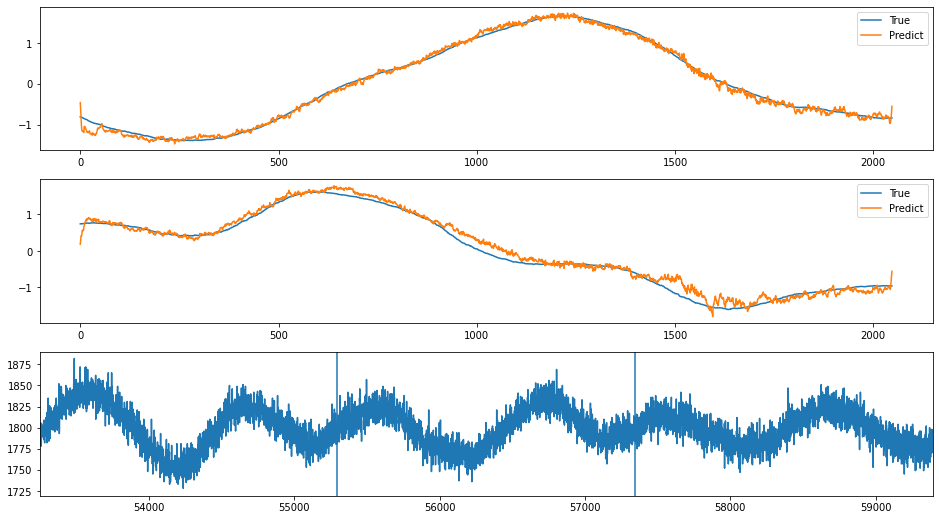

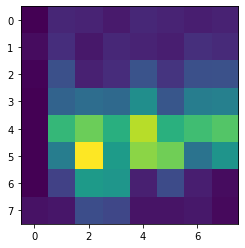

index: 10498
Error: 0.012877721846688863
type                                                         Inst
fill                                                         6200
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-14 23:03:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6200/...
n_bunches                                                     156
bunch_index                                                     8
bunch_number                                                    7
ts_length                                                   65536
chunk                                                           7
Name: 1897, dtype: object


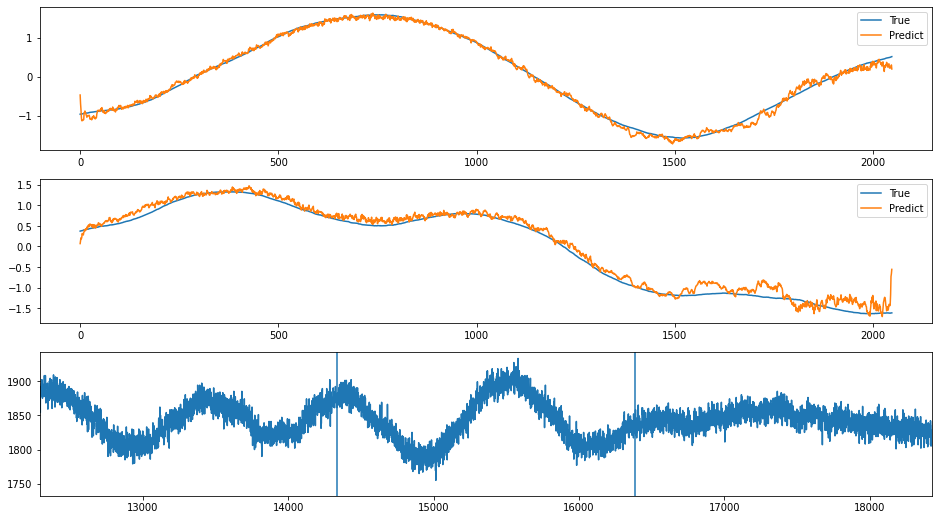

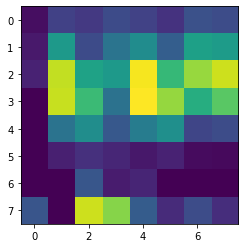

index: 129302
Error: 0.012876720318579536
type                                                         Inst
fill                                                         6392
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-16 12:25:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6392/...
n_bunches                                                    1836
bunch_index                                                  3397
bunch_number                                                 1810
ts_length                                                   65536
chunk                                                          18
Name: 4678, dtype: object


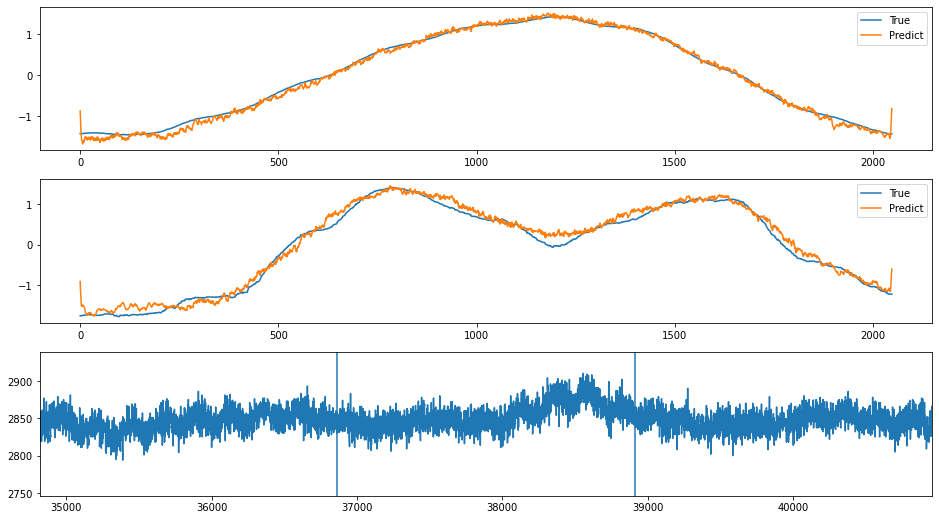

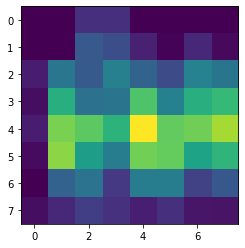

index: 363050
Error: 0.012876608201035762
type                                                         Inst
fill                                                         6757
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-04 08:23:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6757/...
n_bunches                                                    2556
bunch_index                                                    93
bunch_number                                                   25
ts_length                                                   65536
chunk                                                          19
Name: 5025, dtype: object


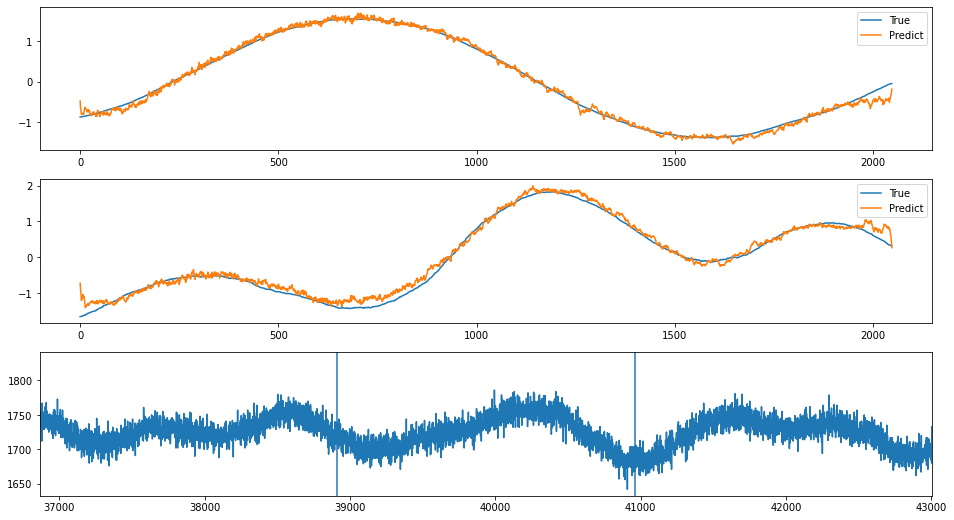

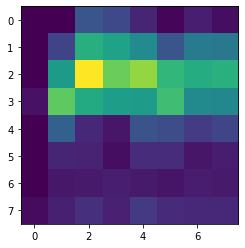

index: 107283
Error: 0.01287657526043302
type                                                         Inst
fill                                                         6700
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-19 04:45:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6700/...
n_bunches                                                    2556
bunch_index                                                  2066
bunch_number                                                 1509
ts_length                                                   65536
chunk                                                          12
Name: 3229, dtype: object


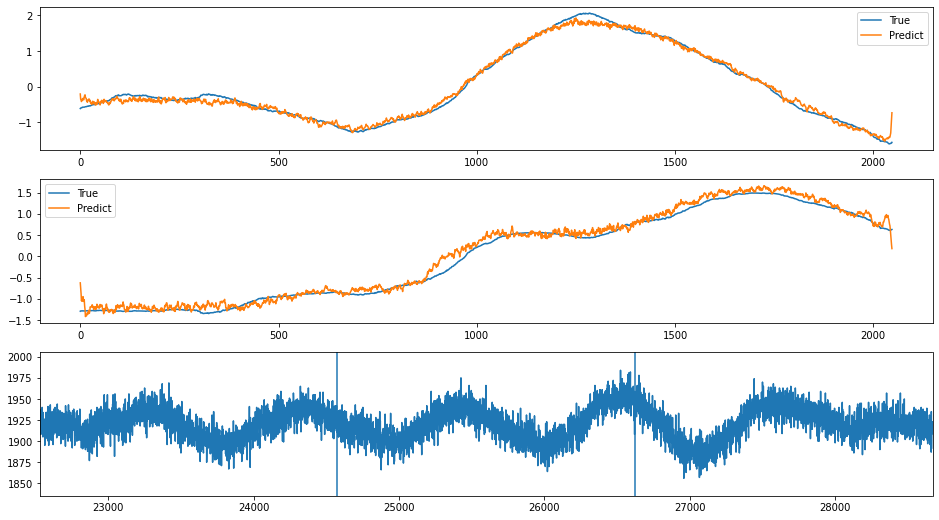

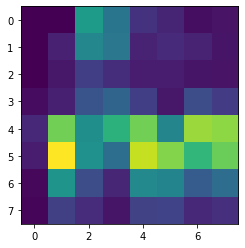

index: 114468
Error: 0.012877904385493473
type                                                         Inst
fill                                                         6243
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-26 06:41:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6243/...
n_bunches                                                    1916
bunch_index                                                  1367
bunch_number                                                  751
ts_length                                                   65536
chunk                                                          17
Name: 4486, dtype: object


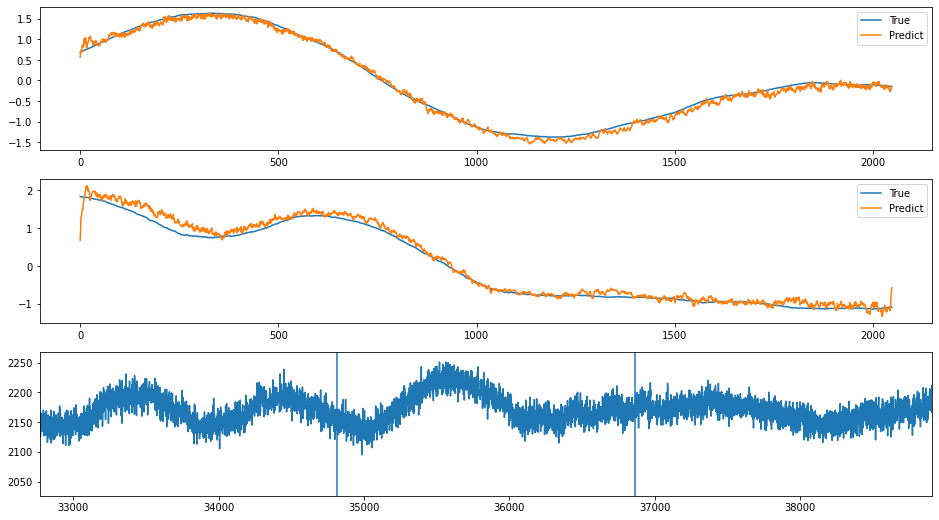

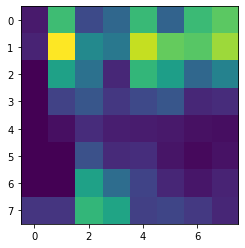

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [32]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
encoded = checker.encode(encoding_true)
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [33]:
encoded_2d.shape

(1024, 64)

In [34]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.1)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.1)
    return fig, axes

In [35]:
import sklearn
from sklearn.manifold import TSNE

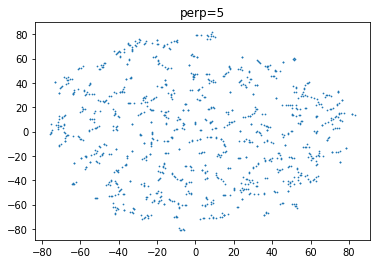

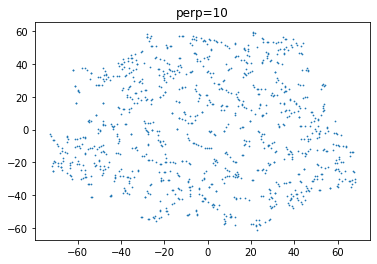

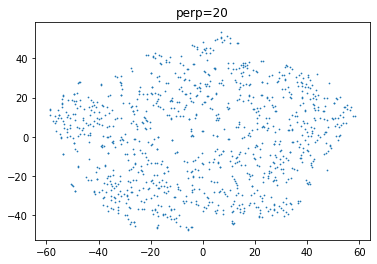

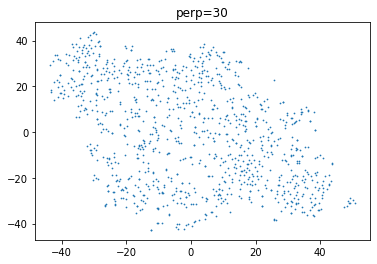

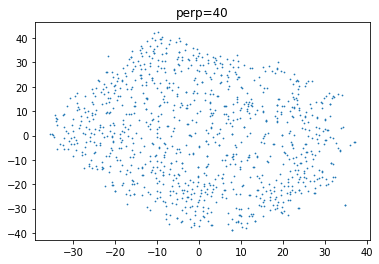

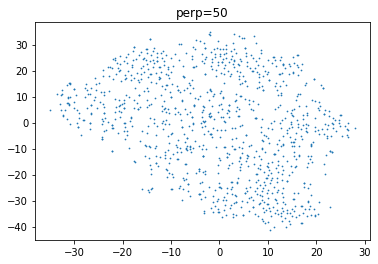

In [36]:
for perplexity in [5, 10, 20, 30, 40, 50]: 
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [37]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

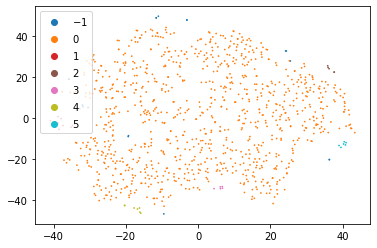

cluster -1
N samples: 19


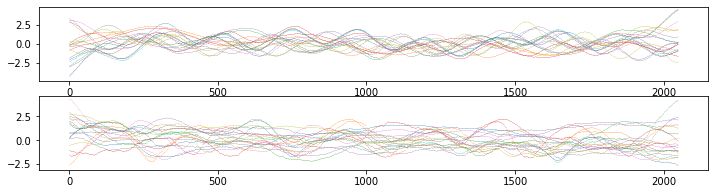

cluster 0
N samples: 971


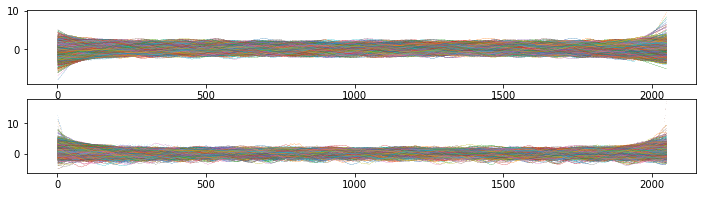

cluster 1
N samples: 11


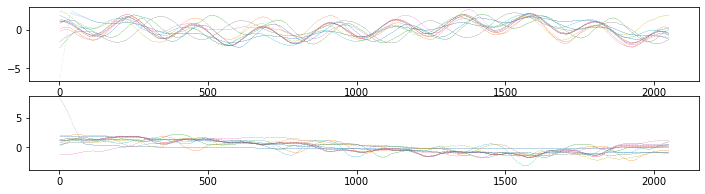

cluster 2
N samples: 5


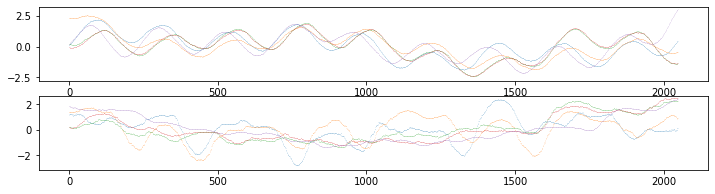

cluster 3
N samples: 5


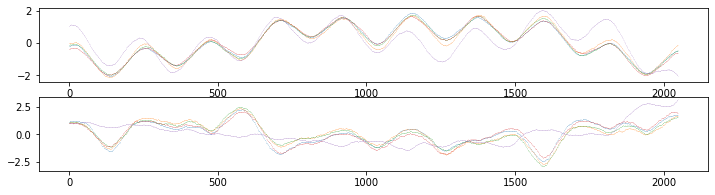

cluster 4
N samples: 7


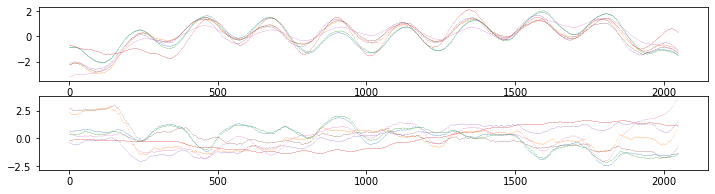

cluster 5
N samples: 6


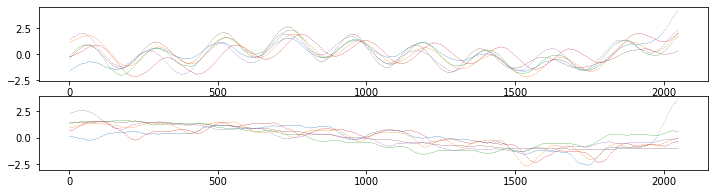

In [38]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4)
clustering = dbscan.fit(encoded_2d_tsne)
sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
plt.legend(*sc.legend_elements())
plt.show()
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    fig, axes = plot_clusters(cluster_indices)
    plt.show()